In [1]:
import numpy as np
from itertools import permutations, combinations
from tqdm import tqdm_notebook as tq
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.read_edgelist('4.graph.txt')
print('кол-вл вершин в G: {},'.format(len(G.nodes())))
print('кол-во ребер в G: {}'.format(len(G.edges())))

кол-вл вершин в G: 1000,
кол-во ребер в G: 15018


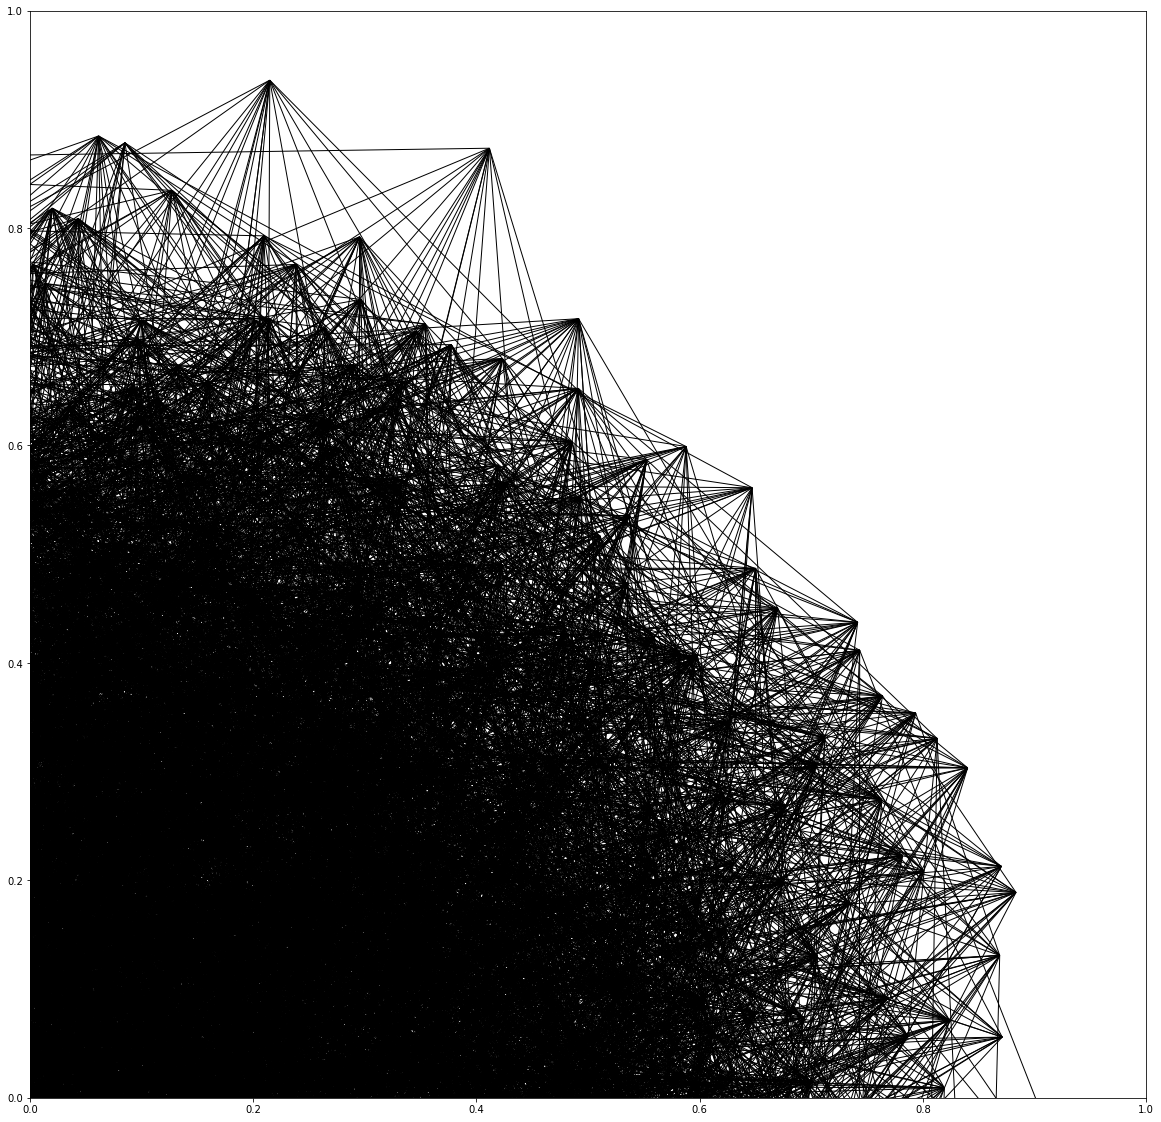

In [3]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
plt.show()

In [60]:
def find_cap_3_plus(G):
    K_33 = []
    K_33_counts = 0
    
    first = []
    second = []

    for n1, n2, n3 in tq(combinations(G.nodes(), 3)):
        cap = (set(G.neighbors(n1)) & set(G.neighbors(n2)) & set(G.neighbors(n3)))
#         print(cap)
#         print(n1,n2,n3)

        if len(cap) > 3:
            for sub_n1, sub_n2, sub_n3 in combinations(list(cap), 3):
                new_K33 = [n1, n2, n3] + [sub_n1, sub_n2, sub_n3]
                new_K33 = [int(i) for i in new_K33]
                first.append([n1,n2,n3])
                second.append([sub_n1, sub_n2, sub_n3])
#                 new_K33 = sorted(new_K33)
                if new_K33 not in K_33 and new_K33[:3] not in second and new_K33[3:] not in first:
                    K_33_counts += 1
                    K_33.append(new_K33)
                    print(K_33_counts)
                    print(new_K33)

        if len(cap) == 3:
            new_K33 = [n1, n2, n3] + list(cap)
            new_K33 = [int(i) for i in new_K33]
            
            first.append([n1,n2,n3])
            second.append(list(cap))
#                 new_K33 = sorted(new_K33)
            if new_K33 not in K_33 and new_K33[:3] not in second and new_K33[3:] not in first:
                K_33_counts += 1
                K_33.append(new_K33)
                print(K_33_counts)
                print(new_K33)
                
    return K_33, K_33_counts
        
    
    

In [77]:
K_6 = nx.complete_graph(n=7)
# K_6.add_node(6)
# K_6.add_edge(6,1)
# K_6.add_edge(6,2)
# K_6.add_edge(6,3)
print(len(K_6.nodes()))
print(len(K_6.edges()))

7
21


In [78]:
K_6.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)])

In [79]:
K_33, K_33_counts = find_cap_3_plus(K_6)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

1
[0, 1, 2, 3, 4, 5]
2
[0, 1, 2, 3, 4, 6]
3
[0, 1, 2, 3, 5, 6]
4
[0, 1, 2, 4, 5, 6]
5
[0, 1, 3, 2, 4, 5]
6
[0, 1, 3, 2, 4, 6]
7
[0, 1, 3, 2, 5, 6]
8
[0, 1, 3, 4, 5, 6]
9
[0, 1, 4, 2, 3, 5]
10
[0, 1, 4, 2, 3, 6]
11
[0, 1, 4, 2, 5, 6]
12
[0, 1, 4, 3, 5, 6]
13
[0, 1, 5, 2, 3, 4]
14
[0, 1, 5, 2, 3, 6]
15
[0, 1, 5, 2, 4, 6]
16
[0, 1, 5, 3, 4, 6]
17
[0, 1, 6, 2, 3, 4]
18
[0, 1, 6, 2, 3, 5]
19
[0, 1, 6, 2, 4, 5]
20
[0, 1, 6, 3, 4, 5]
21
[0, 2, 3, 1, 4, 5]
22
[0, 2, 3, 1, 4, 6]
23
[0, 2, 3, 1, 5, 6]
24
[0, 2, 3, 4, 5, 6]
25
[0, 2, 4, 1, 3, 5]
26
[0, 2, 4, 1, 3, 6]
27
[0, 2, 4, 1, 5, 6]
28
[0, 2, 4, 3, 5, 6]
29
[0, 2, 5, 1, 3, 4]
30
[0, 2, 5, 1, 3, 6]
31
[0, 2, 5, 1, 4, 6]
32
[0, 2, 5, 3, 4, 6]
33
[0, 2, 6, 1, 3, 4]
34
[0, 2, 6, 1, 3, 5]
35
[0, 2, 6, 1, 4, 5]
36
[0, 2, 6, 3, 4, 5]
37
[0, 3, 4, 1, 2, 5]
38
[0, 3, 4, 1, 2, 6]
39
[0, 3, 4, 1, 5, 6]
40
[0, 3, 4, 2, 5, 6]
41
[0, 3, 5, 1, 2, 4]
42
[0, 3, 5, 1, 2, 6]
43
[0, 3, 5, 1, 4, 6]
44
[0, 3, 5, 2, 4, 6]
45
[0, 3, 6, 1, 2, 4]
46
[0, 3, 6, 1, 2, 

In [80]:
check_K33(K_33, K_6)

HBox(children=(IntProgress(value=0, max=60), HTML(value='')))

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во ребер в подграфе: 0
Кол-во треугольников в подгрфе: {}

[]
Кол-во 

60

In [75]:
K_6.subgraph(['3', '5', '1', '2', '4', '0']).edges()

EdgeView([])

In [45]:
K_33, K_33_counts = find_cup_3_plus(G)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

1
[0, 1, 876, 586, 222, 999]
2
[0, 679, 957, 587, 444, 802]
3
[0, 964, 569, 835, 214, 372]
4
[0, 602, 897, 835, 411, 597]
5
[0, 198, 764, 324, 999, 802]
6
[907, 964, 306, 85, 372, 393]
7
[907, 798, 163, 961, 728, 393]
8
[450, 599, 116, 639, 80, 243]
9
[403, 982, 760, 254, 932, 126]
10
[279, 746, 696, 555, 548, 92]
11
[279, 317, 168, 263, 702, 446]
12
[411, 597, 835, 0, 897, 602]
13
[411, 294, 469, 583, 803, 90]
14
[672, 489, 880, 924, 48, 510]
15
[672, 452, 572, 466, 378, 650]
16
[672, 880, 808, 594, 909, 924]
17
[672, 255, 448, 706, 245, 611]
18
[802, 444, 587, 957, 0, 679]
19
[802, 324, 999, 764, 0, 198]
20
[802, 961, 236, 218, 41, 903]
21
[802, 205, 70, 268, 932, 52]
22
[802, 70, 483, 268, 41, 52]
23
[802, 80, 912, 123, 120, 995]
24
[803, 583, 90, 469, 294, 411]
25
[803, 953, 371, 65, 180, 592]
26
[803, 576, 509, 559, 571, 940]
27
[554, 589, 164, 855, 974, 312]
28
[554, 310, 428, 317, 968, 708]
29
[940, 744, 272, 576, 909, 967]
30
[940, 559, 571, 576, 509, 803]
31
[945, 178, 409, 52

244
[832, 111, 535, 561, 371, 655]
245
[609, 823, 805, 784, 708, 557]
246
[998, 727, 781, 257, 988, 183]
247
[998, 465, 619, 575, 357, 729]
248
[250, 895, 146, 350, 93, 20]
249
[6, 45, 306, 173, 393, 992]
250
[6, 576, 638, 640, 886, 377]
251
[6, 948, 758, 461, 836, 200]
252
[640, 886, 377, 576, 6, 638]
253
[640, 773, 275, 467, 374, 243]
254
[261, 684, 49, 96, 528, 296]
255
[393, 173, 992, 306, 6, 45]
256
[393, 961, 728, 907, 163, 798]
257
[393, 826, 915, 935, 345, 334]
258
[393, 728, 968, 786, 163, 187]
259
[836, 200, 461, 758, 6, 948]
260
[927, 344, 237, 469, 8, 192]
261
[927, 213, 530, 920, 572, 889]
262
[807, 976, 760, 508, 893, 265]
263
[575, 147, 236, 957, 465, 950]
264
[575, 357, 729, 619, 465, 998]
265
[575, 916, 777, 619, 227, 922]
266
[452, 61, 310, 515, 686, 36]
267
[452, 61, 74, 515, 824, 36]
268
[452, 785, 572, 866, 466, 378]
269
[461, 665, 219, 758, 228, 46]
270
[461, 741, 422, 226, 365, 228]
271
[461, 741, 382, 226, 365, 228]
272
[461, 422, 382, 226, 365, 228]
273
[848, 1

483
[375, 894, 996, 68, 253, 638]
484
[332, 993, 980, 365, 620, 805]
485
[245, 611, 706, 448, 672, 255]
486
[25, 796, 637, 472, 612, 790]
487
[310, 785, 637, 626, 766, 257]
488
[187, 163, 786, 968, 728, 393]
489
[957, 465, 950, 236, 147, 575]
490
[840, 958, 594, 496, 336, 208]
491
[348, 738, 960, 97, 165, 160]
492
[233, 75, 532, 73, 690, 488]
493
[624, 296, 373, 622, 457, 271]
494
[782, 47, 313, 363, 624, 392]
495
[88, 978, 275, 585, 327, 297]
496
[88, 247, 871, 971, 869, 834]
497
[697, 871, 950, 167, 326, 241]
498
[27, 671, 666, 834, 187, 489]
499
[27, 194, 649, 983, 963, 124]
500
[806, 203, 573, 779, 963, 242]
501
[305, 536, 866, 84, 63, 251]
502
[305, 536, 182, 84, 813, 63]
503
[435, 894, 515, 82, 651, 39]
504
[72, 501, 887, 155, 323, 917]
505
[219, 120, 831, 862, 228, 223]
506
[576, 894, 465, 66, 408, 651]
507
[576, 365, 629, 66, 121, 415]
508
[453, 429, 247, 278, 457, 283]
509
[498, 84, 257, 124, 282, 523]
510
[163, 527, 243, 361, 275, 952]
511
[937, 75, 863, 108, 735, 325]
512
[7

In [7]:
K_33 = []
K_33_counts = 0

for n1, n2, n3 in tq(combinations(G.nodes(), 3)):
    cap = (set(G.neighbors(n1)) & set(G.neighbors(n2)) & set(G.neighbors(n3)))
    
    if len(cap) > 3:
        for sub_n1, sub_n2, sub_n3 in combinations(list(cap), 3):
            new_K33 = [n1, n2, n3] + [sub_n1, sub_n2, sub_n3]
            new_K33 = [int(i) for i in new_K33]
            new_K33 = sorted(new_K33)
            if new_K33 not in K_33:
                K_33_counts += 1
                K_33.append(new_K33)
                print(K_33_counts)
                print(new_K33)
       
    if len(cap) == 3:
        new_K33 = [n1, n2, n3] + list(cap)
        new_K33 = [int(i) for i in new_K33]
        new_K33 = sorted(new_K33)
        if new_K33 not in K_33:
            K_33_counts += 1
            K_33.append(new_K33)
            print(K_33_counts)
            print(new_K33)
        
    
    

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

1
[0, 1, 222, 586, 876, 999]
2
[0, 444, 587, 679, 802, 957]
3
[0, 214, 372, 569, 835, 964]
4
[0, 411, 597, 602, 835, 897]
5
[0, 198, 324, 764, 802, 999]
6
[85, 306, 372, 393, 907, 964]
7
[163, 393, 728, 798, 907, 961]
8
[80, 116, 243, 450, 599, 639]
9
[126, 254, 403, 760, 932, 982]
10
[92, 279, 548, 555, 696, 746]
11
[168, 263, 279, 317, 446, 702]
12
[90, 294, 411, 469, 583, 803]
13
[48, 489, 510, 672, 880, 924]
14
[378, 452, 466, 572, 650, 672]
15
[594, 672, 808, 880, 909, 924]
16
[245, 255, 448, 611, 672, 706]
17
[41, 218, 236, 802, 903, 961]
18
[52, 70, 205, 268, 802, 932]
19
[41, 52, 70, 268, 483, 802]
20
[80, 120, 123, 802, 912, 995]
21
[65, 180, 371, 592, 803, 953]
22
[509, 559, 571, 576, 803, 940]
23
[164, 312, 554, 589, 855, 974]
24
[310, 317, 428, 554, 708, 968]
25
[272, 576, 744, 909, 940, 967]
26
[141, 178, 409, 529, 645, 945]
27
[29, 48, 444, 489, 671, 729]
28
[147, 293, 444, 605, 780, 957]
29
[87, 272, 362, 444, 835, 844]
30
[63, 84, 251, 305, 536, 866]
31
[63, 164, 225, 3

244
[464, 729, 760, 932, 944, 965]
245
[167, 241, 326, 697, 871, 950]
246
[91, 427, 517, 729, 766, 983]
247
[27, 72, 117, 194, 806, 983]
248
[74, 525, 620, 694, 727, 761]
249
[82, 572, 727, 849, 935, 990]
250
[49, 630, 680, 694, 717, 727]
251
[97, 160, 165, 348, 738, 960]
252
[185, 482, 645, 686, 752, 951]
253
[83, 282, 319, 380, 538, 789]
254
[83, 208, 282, 380, 538, 742]
255
[83, 208, 538, 566, 941, 986]
256
[88, 247, 834, 869, 871, 971]
257
[60, 185, 458, 462, 729, 891]
258
[140, 483, 514, 546, 707, 729]
259
[236, 360, 520, 623, 719, 852]
260
[39, 82, 435, 515, 651, 894]
261
[84, 124, 257, 282, 498, 523]
262
[27, 39, 124, 312, 435, 750]
263
[135, 198, 340, 521, 590, 630]
264
[69, 528, 620, 797, 831, 864]
265
[226, 228, 365, 741, 461, 422]
266
[226, 228, 365, 741, 461, 382]
267
[226, 228, 365, 741, 422, 382]
268
[226, 228, 365, 461, 422, 382]
269
[88, 358, 417, 474, 717, 928]
270
[158, 266, 514, 517, 720, 819]
271
[347, 451, 507, 625, 699, 989]
272
[226, 228, 365, 382, 422, 741]
273


In [71]:
def check_K33(K_33, G):
    err = 0
    for i in tq(K_33):
        i = [str(j) for j in i]
        H = G.subgraph(i)
        if len(H.edges()) != 9 or sum(nx.triangles(H).values()) > 0:
            print(H.nodes())
            print('Кол-во ребер в подграфе:', len(H.edges()))
            print('Кол-во треугольников в подгрфе:', nx.triangles(H))
            err += 1
            print()
    return err
        

In [47]:
err

82

In [48]:
K_33_counts

544

In [49]:
544 - 82

462

In [68]:
c = 0
for i in tq(K_33):
    H = G.subgraph(i)
    if len(H.edges()) == 9:
        print(H.nodes())
        print('Кол-во ребер в подграфе:', len(H.edges()))
        print('Кол-во треугольников в подгрфе:', nx.triangles(H))
        c += 1
        print()      

HBox(children=(IntProgress(value=0, max=274), HTML(value='')))

['679', '444', '0', '802', '587', '957']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'679': 0, '444': 0, '0': 0, '802': 0, '587': 0, '957': 0}

['964', '372', '0', '835', '569', '214']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'964': 0, '372': 0, '0': 0, '835': 0, '569': 0, '214': 0}

['411', '602', '597', '0', '835', '897']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'411': 0, '602': 0, '597': 0, '0': 0, '835': 0, '897': 0}

['198', '999', '0', '764', '802', '324']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'198': 0, '999': 0, '0': 0, '764': 0, '802': 0, '324': 0}

['85', '964', '372', '393', '306', '907']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'85': 0, '964': 0, '372': 0, '393': 0, '306': 0, '907': 0}

['961', '798', '728', '393', '163', '907']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'961': 0, '798': 0, '728': 0, '393': 0, '163': 0, '907': 0}

['116', '599', '243', '450', '639'

Кол-во треугольников в подгрфе: {'465': 0, '147': 0, '729': 0, '29': 0, '248': 0, '207': 0}

['980', '668', '32', '604', '805', '513']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'980': 0, '668': 0, '32': 0, '604': 0, '805': 0, '513': 0}

['19', '311', '315', '653', '517', '513']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'19': 0, '311': 0, '315': 0, '653': 0, '517': 0, '513': 0}

['82', '390', '27', '854', '435', '970']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'82': 0, '390': 0, '27': 0, '854': 0, '435': 0, '970': 0}

['180', '572', '224', '398', '540', '866']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'180': 0, '572': 0, '224': 0, '398': 0, '540': 0, '866': 0}

['660', '679', '730', '840', '432', '34']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрфе: {'660': 0, '679': 0, '730': 0, '840': 0, '432': 0, '34': 0}

['792', '84', '766', '668', '888', '35']
Кол-во ребер в подграфе: 9
Кол-во треугольников в подгрф

In [71]:
c

231

In [77]:
K_33_counts  - err

231

In [36]:
['1', '2', '3'] + ['5', '6']

['1', '2', '3', '5', '6']

In [56]:
H = G.subgraph(['378', '452', '466', '572', '650', '672'])
(sum(nx.triangles(H).values()))

0

In [17]:
for i in G.neighbors('0'):
    print(i)
    

902
264
522
907
450
403
279
411
672
802
803
554
940
945
444
63
322
195
324
583
586
587
718
209
597
214
222
843
227
100
614
231
872
746
999
372
835
511


In [34]:
len(set(G.neighbors('0')) & set(G.neighbors('1')) & set(G.neighbors('3')))

0

In [23]:
set(G.neighbors('0'))

{'100',
 '195',
 '209',
 '214',
 '222',
 '227',
 '231',
 '264',
 '279',
 '322',
 '324',
 '372',
 '403',
 '411',
 '444',
 '450',
 '511',
 '522',
 '554',
 '583',
 '586',
 '587',
 '597',
 '614',
 '63',
 '672',
 '718',
 '746',
 '802',
 '803',
 '835',
 '843',
 '872',
 '902',
 '907',
 '940',
 '945',
 '999'}

In [ ]:
22690076

In [5]:
len(list(combinations(G.nodes(), 3)))

166167000

In [ ]:
len(list(combinations(G.nodes(), 6)))

In [4]:
for i in tq(combinations(G.nodes(), 3)):
    print(i)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

('0', '902', '264')
('0', '902', '522')
('0', '902', '907')
('0', '902', '450')
('0', '902', '403')
('0', '902', '279')
('0', '902', '411')
('0', '902', '672')
('0', '902', '802')
('0', '902', '803')
('0', '902', '554')
('0', '902', '940')
('0', '902', '945')
('0', '902', '444')
('0', '902', '63')
('0', '902', '322')
('0', '902', '195')
('0', '902', '324')
('0', '902', '583')
('0', '902', '586')
('0', '902', '587')
('0', '902', '718')
('0', '902', '209')
('0', '902', '597')
('0', '902', '214')
('0', '902', '222')
('0', '902', '843')
('0', '902', '227')
('0', '902', '100')
('0', '902', '614')
('0', '902', '231')
('0', '902', '872')
('0', '902', '746')
('0', '902', '999')
('0', '902', '372')
('0', '902', '835')
('0', '902', '511')
('0', '902', '1')
('0', '902', '896')
('0', '902', '43')
('0', '902', '15')
('0', '902', '144')
('0', '902', '277')
('0', '902', '790')
('0', '902', '799')
('0', '902', '545')
('0', '902', '36')
('0', '902', '683')
('0', '902', '430')
('0', '902', '943')
('0', 

('0', '264', '933')
('0', '264', '808')
('0', '264', '818')
('0', '264', '826')
('0', '264', '709')
('0', '264', '337')
('0', '264', '726')
('0', '264', '235')
('0', '264', '368')
('0', '264', '21')
('0', '264', '272')
('0', '264', '154')
('0', '264', '37')
('0', '264', '422')
('0', '264', '55')
('0', '264', '838')
('0', '264', '455')
('0', '264', '717')
('0', '264', '97')
('0', '264', '354')
('0', '264', '360')
('0', '264', '105')
('0', '264', '236')
('0', '264', '111')
('0', '264', '634')
('0', '264', '126')
('0', '264', '771')
('0', '264', '778')
('0', '264', '269')
('0', '264', '414')
('0', '264', '934')
('0', '264', '681')
('0', '264', '442')
('0', '264', '76')
('0', '264', '954')
('0', '264', '990')
('0', '264', '757')
('0', '264', '23')
('0', '264', '899')
('0', '264', '944')
('0', '264', '420')
('0', '264', '677')
('0', '264', '680')
('0', '264', '696')
('0', '264', '319')
('0', '264', '198')
('0', '264', '714')
('0', '264', '596')
('0', '264', '474')
('0', '264', '95')
('0', '

('0', '522', '910')
('0', '522', '530')
('0', '522', '275')
('0', '522', '340')
('0', '522', '243')
('0', '522', '321')
('0', '522', '912')
('0', '522', '496')
('0', '522', '903')
('0', '522', '138')
('0', '522', '949')
('0', '522', '459')
('0', '522', '573')
('0', '522', '875')
('0', '522', '592')
('0', '522', '156')
('0', '522', '491')
('0', '522', '658')
('0', '522', '509')
('0', '522', '448')
('0', '522', '353')
('0', '522', '415')
('0', '522', '950')
('0', '522', '473')
('0', '522', '398')
('0', '522', '304')
('0', '522', '816')
('0', '522', '926')
('0', '522', '667')
('0', '522', '749')
('0', '522', '885')
('0', '522', '651')
('0', '522', '289')
('0', '522', '262')
('0', '522', '623')
('0', '522', '873')
('0', '522', '644')
('0', '907', '450')
('0', '907', '403')
('0', '907', '279')
('0', '907', '411')
('0', '907', '672')
('0', '907', '802')
('0', '907', '803')
('0', '907', '554')
('0', '907', '940')
('0', '907', '945')
('0', '907', '444')
('0', '907', '63')
('0', '907', '322')
(

('0', '450', '37')
('0', '450', '422')
('0', '450', '55')
('0', '450', '838')
('0', '450', '455')
('0', '450', '717')
('0', '450', '97')
('0', '450', '354')
('0', '450', '360')
('0', '450', '105')
('0', '450', '236')
('0', '450', '111')
('0', '450', '634')
('0', '450', '126')
('0', '450', '771')
('0', '450', '778')
('0', '450', '269')
('0', '450', '414')
('0', '450', '934')
('0', '450', '681')
('0', '450', '442')
('0', '450', '76')
('0', '450', '954')
('0', '450', '990')
('0', '450', '757')
('0', '450', '23')
('0', '450', '899')
('0', '450', '944')
('0', '450', '420')
('0', '450', '677')
('0', '450', '680')
('0', '450', '696')
('0', '450', '319')
('0', '450', '198')
('0', '450', '714')
('0', '450', '596')
('0', '450', '474')
('0', '450', '95')
('0', '450', '494')
('0', '450', '24')
('0', '450', '388')
('0', '450', '523')
('0', '450', '285')
('0', '450', '164')
('0', '450', '423')
('0', '450', '309')
('0', '450', '969')
('0', '450', '375')
('0', '450', '332')
('0', '450', '462')
('0', '

('0', '403', '156')
('0', '403', '491')
('0', '403', '658')
('0', '403', '509')
('0', '403', '448')
('0', '403', '353')
('0', '403', '415')
('0', '403', '950')
('0', '403', '473')
('0', '403', '398')
('0', '403', '304')
('0', '403', '816')
('0', '403', '926')
('0', '403', '667')
('0', '403', '749')
('0', '403', '885')
('0', '403', '651')
('0', '403', '289')
('0', '403', '262')
('0', '403', '623')
('0', '403', '873')
('0', '403', '644')
('0', '279', '411')
('0', '279', '672')
('0', '279', '802')
('0', '279', '803')
('0', '279', '554')
('0', '279', '940')
('0', '279', '945')
('0', '279', '444')
('0', '279', '63')
('0', '279', '322')
('0', '279', '195')
('0', '279', '324')
('0', '279', '583')
('0', '279', '586')
('0', '279', '587')
('0', '279', '718')
('0', '279', '209')
('0', '279', '597')
('0', '279', '214')
('0', '279', '222')
('0', '279', '843')
('0', '279', '227')
('0', '279', '100')
('0', '279', '614')
('0', '279', '231')
('0', '279', '872')
('0', '279', '746')
('0', '279', '999')
(

('0', '411', '954')
('0', '411', '990')
('0', '411', '757')
('0', '411', '23')
('0', '411', '899')
('0', '411', '944')
('0', '411', '420')
('0', '411', '677')
('0', '411', '680')
('0', '411', '696')
('0', '411', '319')
('0', '411', '198')
('0', '411', '714')
('0', '411', '596')
('0', '411', '474')
('0', '411', '95')
('0', '411', '494')
('0', '411', '24')
('0', '411', '388')
('0', '411', '523')
('0', '411', '285')
('0', '411', '164')
('0', '411', '423')
('0', '411', '309')
('0', '411', '969')
('0', '411', '375')
('0', '411', '332')
('0', '411', '462')
('0', '411', '211')
('0', '411', '245')
('0', '411', '759')
('0', '411', '25')
('0', '411', '772')
('0', '411', '647')
('0', '411', '524')
('0', '411', '987')
('0', '411', '170')
('0', '411', '310')
('0', '411', '187')
('0', '411', '957')
('0', '411', '193')
('0', '411', '707')
('0', '411', '840')
('0', '411', '204')
('0', '411', '348')
('0', '411', '997')
('0', '411', '233')
('0', '411', '362')
('0', '411', '624')
('0', '411', '650')
('0'

('0', '802', '940')
('0', '802', '945')
('0', '802', '444')
('0', '802', '63')
('0', '802', '322')
('0', '802', '195')
('0', '802', '324')
('0', '802', '583')
('0', '802', '586')
('0', '802', '587')
('0', '802', '718')
('0', '802', '209')
('0', '802', '597')
('0', '802', '214')
('0', '802', '222')
('0', '802', '843')
('0', '802', '227')
('0', '802', '100')
('0', '802', '614')
('0', '802', '231')
('0', '802', '872')
('0', '802', '746')
('0', '802', '999')
('0', '802', '372')
('0', '802', '835')
('0', '802', '511')
('0', '802', '1')
('0', '802', '896')
('0', '802', '43')
('0', '802', '15')
('0', '802', '144')
('0', '802', '277')
('0', '802', '790')
('0', '802', '799')
('0', '802', '545')
('0', '802', '36')
('0', '802', '683')
('0', '802', '430')
('0', '802', '943')
('0', '802', '50')
('0', '802', '825')
('0', '802', '64')
('0', '802', '449')
('0', '802', '73')
('0', '802', '973')
('0', '802', '591')
('0', '802', '850')
('0', '802', '212')
('0', '802', '218')
('0', '802', '736')
('0', '80

('0', '803', '759')
('0', '803', '25')
('0', '803', '772')
('0', '803', '647')
('0', '803', '524')
('0', '803', '987')
('0', '803', '170')
('0', '803', '310')
('0', '803', '187')
('0', '803', '957')
('0', '803', '193')
('0', '803', '707')
('0', '803', '840')
('0', '803', '204')
('0', '803', '348')
('0', '803', '997')
('0', '803', '233')
('0', '803', '362')
('0', '803', '624')
('0', '803', '650')
('0', '803', '782')
('0', '803', '88')
('0', '803', '150')
('0', '803', '535')
('0', '803', '669')
('0', '803', '813')
('0', '803', '697')
('0', '803', '853')
('0', '803', '366')
('0', '803', '27')
('0', '803', '133')
('0', '803', '149')
('0', '803', '151')
('0', '803', '421')
('0', '803', '806')
('0', '803', '305')
('0', '803', '435')
('0', '803', '439')
('0', '803', '312')
('0', '803', '970')
('0', '803', '72')
('0', '803', '335')
('0', '803', '210')
('0', '803', '611')
('0', '803', '852')
('0', '803', '485')
('0', '803', '255')
('0', '803', '785')
('0', '803', '409')
('0', '803', '219')
('0'

('0', '940', '430')
('0', '940', '943')
('0', '940', '50')
('0', '940', '825')
('0', '940', '64')
('0', '940', '449')
('0', '940', '73')
('0', '940', '973')
('0', '940', '591')
('0', '940', '850')
('0', '940', '212')
('0', '940', '218')
('0', '940', '736')
('0', '940', '995')
('0', '940', '232')
('0', '940', '249')
('0', '940', '125')
('0', '940', '2')
('0', '940', '642')
('0', '940', '260')
('0', '940', '784')
('0', '940', '917')
('0', '940', '22')
('0', '940', '407')
('0', '940', '281')
('0', '940', '539')
('0', '940', '292')
('0', '940', '40')
('0', '940', '445')
('0', '940', '962')
('0', '940', '67')
('0', '940', '585')
('0', '940', '984')
('0', '940', '223')
('0', '940', '361')
('0', '940', '234')
('0', '940', '363')
('0', '940', '238')
('0', '940', '242')
('0', '940', '489')
('0', '940', '122')
('0', '940', '3')
('0', '940', '662')
('0', '940', '7')
('0', '940', '265')
('0', '940', '855')
('0', '940', '396')
('0', '940', '404')
('0', '940', '534')
('0', '940', '924')
('0', '940',

('0', '945', '72')
('0', '945', '335')
('0', '945', '210')
('0', '945', '611')
('0', '945', '852')
('0', '945', '485')
('0', '945', '255')
('0', '945', '785')
('0', '945', '409')
('0', '945', '219')
('0', '945', '428')
('0', '945', '565')
('0', '945', '576')
('0', '945', '453')
('0', '945', '720')
('0', '945', '468')
('0', '945', '347')
('0', '945', '224')
('0', '945', '935')
('0', '945', '498')
('0', '945', '894')
('0', '945', '29')
('0', '945', '777')
('0', '945', '270')
('0', '945', '923')
('0', '945', '284')
('0', '945', '413')
('0', '945', '671')
('0', '945', '163')
('0', '945', '165')
('0', '945', '294')
('0', '945', '937')
('0', '945', '938')
('0', '945', '440')
('0', '945', '702')
('0', '945', '75')
('0', '945', '460')
('0', '945', '207')
('0', '945', '824')
('0', '945', '595')
('0', '945', '993')
('0', '945', '102')
('0', '945', '30')
('0', '945', '410')
('0', '945', '295')
('0', '945', '301')
('0', '945', '437')
('0', '945', '580')
('0', '945', '456')
('0', '945', '74')
('0',

('0', '63', '855')
('0', '63', '396')
('0', '63', '404')
('0', '63', '534')
('0', '63', '924')
('0', '63', '901')
('0', '63', '169')
('0', '63', '810')
('0', '63', '176')
('0', '63', '692')
('0', '63', '606')
('0', '63', '441')
('0', '63', '447')
('0', '63', '705')
('0', '63', '336')
('0', '63', '341')
('0', '63', '121')
('0', '63', '857')
('0', '63', '346')
('0', '63', '475')
('0', '63', '350')
('0', '63', '735')
('0', '63', '608')
('0', '63', '737')
('0', '63', '613')
('0', '63', '743')
('0', '63', '110')
('0', '63', '881')
('0', '63', '248')
('0', '63', '148')
('0', '63', '254')
('0', '63', '4')
('0', '63', '513')
('0', '63', '390')
('0', '63', '913')
('0', '63', '540')
('0', '63', '291')
('0', '63', '166')
('0', '63', '679')
('0', '63', '668')
('0', '63', '46')
('0', '63', '431')
('0', '63', '183')
('0', '63', '827')
('0', '63', '703')
('0', '63', '577')
('0', '63', '711')
('0', '63', '457')
('0', '63', '842')
('0', '63', '93')
('0', '63', '229')
('0', '63', '616')
('0', '63', '497

('0', '322', '456')
('0', '322', '74')
('0', '322', '465')
('0', '322', '240')
('0', '322', '31')
('0', '322', '781')
('0', '322', '685')
('0', '322', '558')
('0', '322', '181')
('0', '322', '578')
('0', '322', '221')
('0', '322', '479')
('0', '322', '113')
('0', '322', '371')
('0', '322', '503')
('0', '322', '123')
('0', '322', '638')
('0', '322', '32')
('0', '322', '408')
('0', '322', '805')
('0', '322', '424')
('0', '322', '58')
('0', '322', '65')
('0', '322', '593')
('0', '322', '728')
('0', '322', '352')
('0', '322', '101')
('0', '322', '116')
('0', '322', '120')
('0', '322', '33')
('0', '322', '516')
('0', '322', '514')
('0', '322', '919')
('0', '322', '795')
('0', '322', '925')
('0', '322', '290')
('0', '322', '552')
('0', '322', '955')
('0', '322', '203')
('0', '322', '610')
('0', '322', '740')
('0', '322', '228')
('0', '322', '627')
('0', '322', '756')
('0', '322', '34')
('0', '322', '812')
('0', '322', '789')
('0', '322', '162')
('0', '322', '44')
('0', '322', '648')
('0', '3

('0', '324', '45')
('0', '324', '434')
('0', '324', '698')
('0', '324', '837')
('0', '324', '712')
('0', '324', '721')
('0', '324', '467')
('0', '324', '599')
('0', '324', '858')
('0', '324', '481')
('0', '324', '994')
('0', '324', '355')
('0', '324', '868')
('0', '324', '358')
('0', '324', '876')
('0', '324', '20')
('0', '324', '271')
('0', '324', '401')
('0', '324', '146')
('0', '324', '280')
('0', '324', '933')
('0', '324', '808')
('0', '324', '818')
('0', '324', '826')
('0', '324', '709')
('0', '324', '337')
('0', '324', '726')
('0', '324', '235')
('0', '324', '368')
('0', '324', '21')
('0', '324', '272')
('0', '324', '154')
('0', '324', '37')
('0', '324', '422')
('0', '324', '55')
('0', '324', '838')
('0', '324', '455')
('0', '324', '717')
('0', '324', '97')
('0', '324', '354')
('0', '324', '360')
('0', '324', '105')
('0', '324', '236')
('0', '324', '111')
('0', '324', '634')
('0', '324', '126')
('0', '324', '771')
('0', '324', '778')
('0', '324', '269')
('0', '324', '414')
('0', 

('0', '583', '694')
('0', '583', '845')
('0', '583', '732')
('0', '583', '630')
('0', '583', '127')
('0', '583', '786')
('0', '583', '661')
('0', '583', '296')
('0', '583', '682')
('0', '583', '559')
('0', '583', '562')
('0', '583', '51')
('0', '583', '566')
('0', '583', '213')
('0', '583', '863')
('0', '583', '99')
('0', '583', '877')
('0', '583', '755')
('0', '583', '891')
('0', '583', '639')
('0', '583', '256')
('0', '583', '900')
('0', '583', '143')
('0', '583', '579')
('0', '583', '793')
('0', '583', '549')
('0', '583', '570')
('0', '583', '572')
('0', '583', '965')
('0', '583', '828')
('0', '583', '752')
('0', '583', '958')
('0', '583', '767')
('0', '583', '39')
('0', '583', '515')
('0', '583', '833')
('0', '583', '556')
('0', '583', '764')
('0', '583', '687')
('0', '583', '180')
('0', '583', '695')
('0', '583', '829')
('0', '583', '206')
('0', '583', '81')
('0', '583', '598')
('0', '583', '241')
('0', '583', '380')
('0', '583', '189')
('0', '583', '704')
('0', '583', '69')
('0',

('0', '587', '838')
('0', '587', '455')
('0', '587', '717')
('0', '587', '97')
('0', '587', '354')
('0', '587', '360')
('0', '587', '105')
('0', '587', '236')
('0', '587', '111')
('0', '587', '634')
('0', '587', '126')
('0', '587', '771')
('0', '587', '778')
('0', '587', '269')
('0', '587', '414')
('0', '587', '934')
('0', '587', '681')
('0', '587', '442')
('0', '587', '76')
('0', '587', '954')
('0', '587', '990')
('0', '587', '757')
('0', '587', '23')
('0', '587', '899')
('0', '587', '944')
('0', '587', '420')
('0', '587', '677')
('0', '587', '680')
('0', '587', '696')
('0', '587', '319')
('0', '587', '198')
('0', '587', '714')
('0', '587', '596')
('0', '587', '474')
('0', '587', '95')
('0', '587', '494')
('0', '587', '24')
('0', '587', '388')
('0', '587', '523')
('0', '587', '285')
('0', '587', '164')
('0', '587', '423')
('0', '587', '309')
('0', '587', '969')
('0', '587', '375')
('0', '587', '332')
('0', '587', '462')
('0', '587', '211')
('0', '587', '245')
('0', '587', '759')
('0',

('0', '209', '186')
('0', '209', '66')
('0', '209', '246')
('0', '209', '334')
('0', '209', '85')
('0', '209', '854')
('0', '209', '476')
('0', '209', '500')
('0', '209', '502')
('0', '209', '251')
('0', '209', '383')
('0', '209', '10')
('0', '209', '258')
('0', '209', '11')
('0', '209', '908')
('0', '209', '533')
('0', '209', '922')
('0', '209', '543')
('0', '209', '932')
('0', '209', '167')
('0', '209', '942')
('0', '209', '841')
('0', '209', '851')
('0', '209', '981')
('0', '209', '983')
('0', '209', '727')
('0', '209', '730')
('0', '209', '859')
('0', '209', '631')
('0', '209', '633')
('0', '209', '893')
('0', '209', '895')
('0', '209', '643')
('0', '209', '392')
('0', '209', '779')
('0', '209', '26')
('0', '209', '160')
('0', '209', '42')
('0', '209', '327')
('0', '209', '48')
('0', '209', '178')
('0', '209', '959')
('0', '209', '325')
('0', '209', '199')
('0', '209', '87')
('0', '209', '600')
('0', '209', '874')
('0', '209', '12')
('0', '209', '645')
('0', '209', '364')
('0', '20

('0', '597', '313')
('0', '597', '194')
('0', '597', '197')
('0', '597', '49')
('0', '597', '652')
('0', '597', '527')
('0', '597', '528')
('0', '597', '529')
('0', '597', '866')
('0', '597', '338')
('0', '597', '96')
('0', '597', '225')
('0', '597', '484')
('0', '597', '691')
('0', '597', '495')
('0', '597', '471')
('0', '597', '621')
('0', '597', '904')
('0', '597', '83')
('0', '597', '53')
('0', '597', '257')
('0', '597', '171')
('0', '597', '433')
('0', '597', '713')
('0', '597', '605')
('0', '597', '996')
('0', '597', '359')
('0', '597', '376')
('0', '597', '768')
('0', '597', '780')
('0', '597', '532')
('0', '597', '796')
('0', '597', '550')
('0', '597', '968')
('0', '597', '308')
('0', '597', '188')
('0', '597', '594')
('0', '597', '758')
('0', '597', '632')
('0', '597', '636')
('0', '597', '978')
('0', '597', '141')
('0', '597', '820')
('0', '597', '856')
('0', '597', '774')
('0', '597', '425')
('0', '597', '947')
('0', '597', '590')
('0', '597', '974')
('0', '597', '488')
('0'

('0', '222', '611')
('0', '222', '852')
('0', '222', '485')
('0', '222', '255')
('0', '222', '785')
('0', '222', '409')
('0', '222', '219')
('0', '222', '428')
('0', '222', '565')
('0', '222', '576')
('0', '222', '453')
('0', '222', '720')
('0', '222', '468')
('0', '222', '347')
('0', '222', '224')
('0', '222', '935')
('0', '222', '498')
('0', '222', '894')
('0', '222', '29')
('0', '222', '777')
('0', '222', '270')
('0', '222', '923')
('0', '222', '284')
('0', '222', '413')
('0', '222', '671')
('0', '222', '163')
('0', '222', '165')
('0', '222', '294')
('0', '222', '937')
('0', '222', '938')
('0', '222', '440')
('0', '222', '702')
('0', '222', '75')
('0', '222', '460')
('0', '222', '207')
('0', '222', '824')
('0', '222', '595')
('0', '222', '993')
('0', '222', '102')
('0', '222', '30')
('0', '222', '410')
('0', '222', '295')
('0', '222', '301')
('0', '222', '437')
('0', '222', '580')
('0', '222', '456')
('0', '222', '74')
('0', '222', '465')
('0', '222', '240')
('0', '222', '31')
('0',

('0', '227', '231')
('0', '227', '872')
('0', '227', '746')
('0', '227', '999')
('0', '227', '372')
('0', '227', '835')
('0', '227', '511')
('0', '227', '1')
('0', '227', '896')
('0', '227', '43')
('0', '227', '15')
('0', '227', '144')
('0', '227', '277')
('0', '227', '790')
('0', '227', '799')
('0', '227', '545')
('0', '227', '36')
('0', '227', '683')
('0', '227', '430')
('0', '227', '943')
('0', '227', '50')
('0', '227', '825')
('0', '227', '64')
('0', '227', '449')
('0', '227', '73')
('0', '227', '973')
('0', '227', '591')
('0', '227', '850')
('0', '227', '212')
('0', '227', '218')
('0', '227', '736')
('0', '227', '995')
('0', '227', '232')
('0', '227', '249')
('0', '227', '125')
('0', '227', '2')
('0', '227', '642')
('0', '227', '260')
('0', '227', '784')
('0', '227', '917')
('0', '227', '22')
('0', '227', '407')
('0', '227', '281')
('0', '227', '539')
('0', '227', '292')
('0', '227', '40')
('0', '227', '445')
('0', '227', '962')
('0', '227', '67')
('0', '227', '585')
('0', '227', 

('0', '100', '977')
('0', '100', '84')
('0', '100', '731')
('0', '100', '914')
('0', '100', '537')
('0', '100', '429')
('0', '100', '313')
('0', '100', '194')
('0', '100', '197')
('0', '100', '49')
('0', '100', '652')
('0', '100', '527')
('0', '100', '528')
('0', '100', '529')
('0', '100', '866')
('0', '100', '338')
('0', '100', '96')
('0', '100', '225')
('0', '100', '484')
('0', '100', '691')
('0', '100', '495')
('0', '100', '471')
('0', '100', '621')
('0', '100', '904')
('0', '100', '83')
('0', '100', '53')
('0', '100', '257')
('0', '100', '171')
('0', '100', '433')
('0', '100', '713')
('0', '100', '605')
('0', '100', '996')
('0', '100', '359')
('0', '100', '376')
('0', '100', '768')
('0', '100', '780')
('0', '100', '532')
('0', '100', '796')
('0', '100', '550')
('0', '100', '968')
('0', '100', '308')
('0', '100', '188')
('0', '100', '594')
('0', '100', '758')
('0', '100', '632')
('0', '100', '636')
('0', '100', '978')
('0', '100', '141')
('0', '100', '820')
('0', '100', '856')
('0',

('0', '231', '568')
('0', '231', '700')
('0', '231', '961')
('0', '231', '963')
('0', '231', '68')
('0', '231', '581')
('0', '231', '584')
('0', '231', '979')
('0', '231', '344')
('0', '231', '345')
('0', '231', '357')
('0', '231', '230')
('0', '231', '615')
('0', '231', '237')
('0', '231', '112')
('0', '231', '369')
('0', '231', '754')
('0', '231', '787')
('0', '231', '128')
('0', '231', '139')
('0', '231', '268')
('0', '231', '273')
('0', '231', '274')
('0', '231', '916')
('0', '231', '405')
('0', '231', '798')
('0', '231', '161')
('0', '231', '804')
('0', '231', '823')
('0', '231', '186')
('0', '231', '66')
('0', '231', '246')
('0', '231', '334')
('0', '231', '85')
('0', '231', '854')
('0', '231', '476')
('0', '231', '500')
('0', '231', '502')
('0', '231', '251')
('0', '231', '383')
('0', '231', '10')
('0', '231', '258')
('0', '231', '11')
('0', '231', '908')
('0', '231', '533')
('0', '231', '922')
('0', '231', '543')
('0', '231', '932')
('0', '231', '167')
('0', '231', '942')
('0',

('0', '872', '413')
('0', '872', '671')
('0', '872', '163')
('0', '872', '165')
('0', '872', '294')
('0', '872', '937')
('0', '872', '938')
('0', '872', '440')
('0', '872', '702')
('0', '872', '75')
('0', '872', '460')
('0', '872', '207')
('0', '872', '824')
('0', '872', '595')
('0', '872', '993')
('0', '872', '102')
('0', '872', '30')
('0', '872', '410')
('0', '872', '295')
('0', '872', '301')
('0', '872', '437')
('0', '872', '580')
('0', '872', '456')
('0', '872', '74')
('0', '872', '465')
('0', '872', '240')
('0', '872', '31')
('0', '872', '781')
('0', '872', '685')
('0', '872', '558')
('0', '872', '181')
('0', '872', '578')
('0', '872', '221')
('0', '872', '479')
('0', '872', '113')
('0', '872', '371')
('0', '872', '503')
('0', '872', '123')
('0', '872', '638')
('0', '872', '32')
('0', '872', '408')
('0', '872', '805')
('0', '872', '424')
('0', '872', '58')
('0', '872', '65')
('0', '872', '593')
('0', '872', '728')
('0', '872', '352')
('0', '872', '101')
('0', '872', '116')
('0', '

('0', '999', '541')
('0', '999', '927')
('0', '999', '807')
('0', '999', '173')
('0', '999', '443')
('0', '999', '574')
('0', '999', '575')
('0', '999', '452')
('0', '999', '710')
('0', '999', '200')
('0', '999', '461')
('0', '999', '589')
('0', '999', '848')
('0', '999', '612')
('0', '999', '603')
('0', '999', '992')
('0', '999', '739')
('0', '999', '886')
('0', '999', '377')
('0', '999', '518')
('0', '999', '263')
('0', '999', '911')
('0', '999', '400')
('0', '999', '665')
('0', '999', '286')
('0', '999', '675')
('0', '999', '293')
('0', '999', '936')
('0', '999', '297')
('0', '999', '555')
('0', '999', '557')
('0', '999', '688')
('0', '999', '317')
('0', '999', '715')
('0', '999', '215')
('0', '999', '607')
('0', '999', '480')
('0', '999', '865')
('0', '999', '356')
('0', '999', '882')
('0', '999', '374')
('0', '999', '890')
('0', '999', '381')
('0', '999', '8')
('0', '999', '770')
('0', '999', '216')
('0', '999', '147')
('0', '999', '964')
('0', '999', '283')
('0', '999', '542')
('

('0', '372', '845')
('0', '372', '732')
('0', '372', '630')
('0', '372', '127')
('0', '372', '786')
('0', '372', '661')
('0', '372', '296')
('0', '372', '682')
('0', '372', '559')
('0', '372', '562')
('0', '372', '51')
('0', '372', '566')
('0', '372', '213')
('0', '372', '863')
('0', '372', '99')
('0', '372', '877')
('0', '372', '755')
('0', '372', '891')
('0', '372', '639')
('0', '372', '256')
('0', '372', '900')
('0', '372', '143')
('0', '372', '579')
('0', '372', '793')
('0', '372', '549')
('0', '372', '570')
('0', '372', '572')
('0', '372', '965')
('0', '372', '828')
('0', '372', '752')
('0', '372', '958')
('0', '372', '767')
('0', '372', '39')
('0', '372', '515')
('0', '372', '833')
('0', '372', '556')
('0', '372', '764')
('0', '372', '687')
('0', '372', '180')
('0', '372', '695')
('0', '372', '829')
('0', '372', '206')
('0', '372', '81')
('0', '372', '598')
('0', '372', '241')
('0', '372', '380')
('0', '372', '189')
('0', '372', '704')
('0', '372', '69')
('0', '372', '849')
('0',

('0', '511', '939')
('0', '511', '567')
('0', '511', '185')
('0', '511', '61')
('0', '511', '701')
('0', '511', '708')
('0', '511', '70')
('0', '511', '330')
('0', '511', '972')
('0', '511', '744')
('0', '511', '108')
('0', '511', '625')
('0', '511', '370')
('0', '511', '18')
('0', '511', '129')
('0', '511', '387')
('0', '511', '776')
('0', '511', '659')
('0', '511', '663')
('0', '511', '967')
('0', '511', '184')
('0', '511', '839')
('0', '511', '971')
('0', '511', '724')
('0', '511', '601')
('0', '511', '91')
('0', '511', '118')
('0', '511', '888')
('0', '511', '19')
('0', '511', '517')
('0', '511', '646')
('0', '511', '135')
('0', '511', '653')
('0', '511', '783')
('0', '511', '931')
('0', '511', '775')
('0', '511', '172')
('0', '511', '45')
('0', '511', '434')
('0', '511', '698')
('0', '511', '837')
('0', '511', '712')
('0', '511', '721')
('0', '511', '467')
('0', '511', '599')
('0', '511', '858')
('0', '511', '481')
('0', '511', '994')
('0', '511', '355')
('0', '511', '868')
('0', 

('0', '1', '78')
('0', '1', '94')
('0', '1', '869')
('0', '1', '486')
('0', '1', '622')
('0', '1', '136')
('0', '1', '656')
('0', '1', '536')
('0', '1', '153')
('0', '1', '867')
('0', '1', '339')
('0', '1', '507')
('0', '1', '670')
('0', '1', '800')
('0', '1', '948')
('0', '1', '329')
('0', '1', '719')
('0', '1', '734')
('0', '1', '617')
('0', '1', '114')
('0', '1', '915')
('0', '1', '132')
('0', '1', '140')
('0', '1', '526')
('0', '1', '548')
('0', '1', '831')
('0', '1', '892')
('0', '1', '725')
('0', '1', '54')
('0', '1', '986')
('0', '1', '989')
('0', '1', '864')
('0', '1', '505')
('0', '1', '47')
('0', '1', '416')
('0', '1', '815')
('0', '1', '738')
('0', '1', '208')
('0', '1', '977')
('0', '1', '84')
('0', '1', '731')
('0', '1', '914')
('0', '1', '537')
('0', '1', '429')
('0', '1', '313')
('0', '1', '194')
('0', '1', '197')
('0', '1', '49')
('0', '1', '652')
('0', '1', '527')
('0', '1', '528')
('0', '1', '529')
('0', '1', '866')
('0', '1', '338')
('0', '1', '96')
('0', '1', '225')

('0', '43', '889')
('0', '43', '763')
('0', '43', '384')
('0', '43', '520')
('0', '43', '674')
('0', '43', '686')
('0', '43', '822')
('0', '43', '60')
('0', '43', '191')
('0', '43', '847')
('0', '43', '82')
('0', '43', '477')
('0', '43', '103')
('0', '43', '504')
('0', '43', '124')
('0', '43', '389')
('0', '43', '521')
('0', '43', '797')
('0', '43', '801')
('0', '43', '38')
('0', '43', '307')
('0', '43', '56')
('0', '43', '884')
('0', '43', '323')
('0', '43', '844')
('0', '43', '343')
('0', '43', '472')
('0', '43', '349')
('0', '43', '226')
('0', '43', '106')
('0', '43', '244')
('0', '43', '379')
('0', '43', '654')
('0', '43', '399')
('0', '43', '276')
('0', '43', '928')
('0', '43', '35')
('0', '43', '966')
('0', '43', '988')
('0', '43', '819')
('0', '43', '821')
('0', '43', '438')
('0', '43', '311')
('0', '43', '320')
('0', '43', '451')
('0', '43', '582')
('0', '43', '464')
('0', '43', '602')
('0', '43', '92')
('0', '43', '991')
('0', '43', '487')
('0', '43', '618')
('0', '43', '753')

('0', '15', '427')
('0', '15', '397')
('0', '15', '402')
('0', '15', '920')
('0', '15', '303')
('0', '15', '510')
('0', '15', '564')
('0', '15', '182')
('0', '15', '79')
('0', '15', '723')
('0', '15', '490')
('0', '15', '115')
('0', '15', '773')
('0', '15', '446')
('0', '15', '716')
('0', '15', '980')
('0', '15', '158')
('0', '15', '302')
('0', '15', '960')
('0', '15', '463')
('0', '15', '247')
('0', '15', '252')
('0', '15', '454')
('0', '15', '629')
('0', '15', '766')
('0', '15', '791')
('0', '15', '466')
('0', '15', '239')
('0', '15', '760')
('0', '15', '637')
('0', '15', '282')
('0', '15', '318')
('0', '15', '588')
('0', '15', '897')
('0', '15', '130')
('0', '15', '86')
('0', '15', '620')
('0', '15', '499')
('0', '15', '689')
('0', '15', '951')
('0', '15', '80')
('0', '15', '71')
('0', '15', '300')
('0', '15', '306')
('0', '15', '862')
('0', '15', '155')
('0', '15', '676')
('0', '15', '177')
('0', '15', '202')
('0', '15', '906')
('0', '15', '619')
('0', '15', '192')
('0', '15', '690

('0', '277', '124')
('0', '277', '389')
('0', '277', '521')
('0', '277', '797')
('0', '277', '801')
('0', '277', '38')
('0', '277', '307')
('0', '277', '56')
('0', '277', '884')
('0', '277', '323')
('0', '277', '844')
('0', '277', '343')
('0', '277', '472')
('0', '277', '349')
('0', '277', '226')
('0', '277', '106')
('0', '277', '244')
('0', '277', '379')
('0', '277', '654')
('0', '277', '399')
('0', '277', '276')
('0', '277', '928')
('0', '277', '35')
('0', '277', '966')
('0', '277', '988')
('0', '277', '819')
('0', '277', '821')
('0', '277', '438')
('0', '277', '311')
('0', '277', '320')
('0', '277', '451')
('0', '277', '582')
('0', '277', '464')
('0', '277', '602')
('0', '277', '92')
('0', '277', '991')
('0', '277', '487')
('0', '277', '618')
('0', '277', '753')
('0', '277', '761')
('0', '277', '16')
('0', '277', '259')
('0', '277', '525')
('0', '277', '930')
('0', '277', '684')
('0', '277', '175')
('0', '277', '699')
('0', '277', '201')
('0', '277', '351')
('0', '277', '741')
('0',

('0', '790', '564')
('0', '790', '182')
('0', '790', '79')
('0', '790', '723')
('0', '790', '490')
('0', '790', '115')
('0', '790', '773')
('0', '790', '446')
('0', '790', '716')
('0', '790', '980')
('0', '790', '158')
('0', '790', '302')
('0', '790', '960')
('0', '790', '463')
('0', '790', '247')
('0', '790', '252')
('0', '790', '454')
('0', '790', '629')
('0', '790', '766')
('0', '790', '791')
('0', '790', '466')
('0', '790', '239')
('0', '790', '760')
('0', '790', '637')
('0', '790', '282')
('0', '790', '318')
('0', '790', '588')
('0', '790', '897')
('0', '790', '130')
('0', '790', '86')
('0', '790', '620')
('0', '790', '499')
('0', '790', '689')
('0', '790', '951')
('0', '790', '80')
('0', '790', '71')
('0', '790', '300')
('0', '790', '306')
('0', '790', '862')
('0', '790', '155')
('0', '790', '676')
('0', '790', '177')
('0', '790', '202')
('0', '790', '906')
('0', '790', '619')
('0', '790', '192')
('0', '790', '690')
('0', '790', '975')
('0', '790', '386')
('0', '790', '561')
('0'

('0', '545', '673')
('0', '545', '418')
('0', '545', '939')
('0', '545', '567')
('0', '545', '185')
('0', '545', '61')
('0', '545', '701')
('0', '545', '708')
('0', '545', '70')
('0', '545', '330')
('0', '545', '972')
('0', '545', '744')
('0', '545', '108')
('0', '545', '625')
('0', '545', '370')
('0', '545', '18')
('0', '545', '129')
('0', '545', '387')
('0', '545', '776')
('0', '545', '659')
('0', '545', '663')
('0', '545', '967')
('0', '545', '184')
('0', '545', '839')
('0', '545', '971')
('0', '545', '724')
('0', '545', '601')
('0', '545', '91')
('0', '545', '118')
('0', '545', '888')
('0', '545', '19')
('0', '545', '517')
('0', '545', '646')
('0', '545', '135')
('0', '545', '653')
('0', '545', '783')
('0', '545', '931')
('0', '545', '775')
('0', '545', '172')
('0', '545', '45')
('0', '545', '434')
('0', '545', '698')
('0', '545', '837')
('0', '545', '712')
('0', '545', '721')
('0', '545', '467')
('0', '545', '599')
('0', '545', '858')
('0', '545', '481')
('0', '545', '994')
('0', 

('0', '683', '461')
('0', '683', '589')
('0', '683', '848')
('0', '683', '612')
('0', '683', '603')
('0', '683', '992')
('0', '683', '739')
('0', '683', '886')
('0', '683', '377')
('0', '683', '518')
('0', '683', '263')
('0', '683', '911')
('0', '683', '400')
('0', '683', '665')
('0', '683', '286')
('0', '683', '675')
('0', '683', '293')
('0', '683', '936')
('0', '683', '297')
('0', '683', '555')
('0', '683', '557')
('0', '683', '688')
('0', '683', '317')
('0', '683', '715')
('0', '683', '215')
('0', '683', '607')
('0', '683', '480')
('0', '683', '865')
('0', '683', '356')
('0', '683', '882')
('0', '683', '374')
('0', '683', '890')
('0', '683', '381')
('0', '683', '8')
('0', '683', '770')
('0', '683', '216')
('0', '683', '147')
('0', '683', '964')
('0', '683', '283')
('0', '683', '542')
('0', '683', '880')
('0', '683', '426')
('0', '683', '432')
('0', '683', '52')
('0', '683', '568')
('0', '683', '700')
('0', '683', '961')
('0', '683', '963')
('0', '683', '68')
('0', '683', '581')
('0'

('0', '430', '528')
('0', '430', '529')
('0', '430', '866')
('0', '430', '338')
('0', '430', '96')
('0', '430', '225')
('0', '430', '484')
('0', '430', '691')
('0', '430', '495')
('0', '430', '471')
('0', '430', '621')
('0', '430', '904')
('0', '430', '83')
('0', '430', '53')
('0', '430', '257')
('0', '430', '171')
('0', '430', '433')
('0', '430', '713')
('0', '430', '605')
('0', '430', '996')
('0', '430', '359')
('0', '430', '376')
('0', '430', '768')
('0', '430', '780')
('0', '430', '532')
('0', '430', '796')
('0', '430', '550')
('0', '430', '968')
('0', '430', '308')
('0', '430', '188')
('0', '430', '594')
('0', '430', '758')
('0', '430', '632')
('0', '430', '636')
('0', '430', '978')
('0', '430', '141')
('0', '430', '820')
('0', '430', '856')
('0', '430', '774')
('0', '430', '425')
('0', '430', '947')
('0', '430', '590')
('0', '430', '974')
('0', '430', '488')
('0', '430', '365')
('0', '430', '57')
('0', '430', '417')
('0', '430', '830')
('0', '430', '745')
('0', '430', '883')
('0'

('0', '50', '467')
('0', '50', '599')
('0', '50', '858')
('0', '50', '481')
('0', '50', '994')
('0', '50', '355')
('0', '50', '868')
('0', '50', '358')
('0', '50', '876')
('0', '50', '20')
('0', '50', '271')
('0', '50', '401')
('0', '50', '146')
('0', '50', '280')
('0', '50', '933')
('0', '50', '808')
('0', '50', '818')
('0', '50', '826')
('0', '50', '709')
('0', '50', '337')
('0', '50', '726')
('0', '50', '235')
('0', '50', '368')
('0', '50', '21')
('0', '50', '272')
('0', '50', '154')
('0', '50', '37')
('0', '50', '422')
('0', '50', '55')
('0', '50', '838')
('0', '50', '455')
('0', '50', '717')
('0', '50', '97')
('0', '50', '354')
('0', '50', '360')
('0', '50', '105')
('0', '50', '236')
('0', '50', '111')
('0', '50', '634')
('0', '50', '126')
('0', '50', '771')
('0', '50', '778')
('0', '50', '269')
('0', '50', '414')
('0', '50', '934')
('0', '50', '681')
('0', '50', '442')
('0', '50', '76')
('0', '50', '954')
('0', '50', '990')
('0', '50', '757')
('0', '50', '23')
('0', '50', '899')


('0', '64', '323')
('0', '64', '844')
('0', '64', '343')
('0', '64', '472')
('0', '64', '349')
('0', '64', '226')
('0', '64', '106')
('0', '64', '244')
('0', '64', '379')
('0', '64', '654')
('0', '64', '399')
('0', '64', '276')
('0', '64', '928')
('0', '64', '35')
('0', '64', '966')
('0', '64', '988')
('0', '64', '819')
('0', '64', '821')
('0', '64', '438')
('0', '64', '311')
('0', '64', '320')
('0', '64', '451')
('0', '64', '582')
('0', '64', '464')
('0', '64', '602')
('0', '64', '92')
('0', '64', '991')
('0', '64', '487')
('0', '64', '618')
('0', '64', '753')
('0', '64', '761')
('0', '64', '16')
('0', '64', '259')
('0', '64', '525')
('0', '64', '930')
('0', '64', '684')
('0', '64', '175')
('0', '64', '699')
('0', '64', '201')
('0', '64', '351')
('0', '64', '741')
('0', '64', '750')
('0', '64', '367')
('0', '64', '506')
('0', '64', '17')
('0', '64', '747')
('0', '64', '137')
('0', '64', '909')
('0', '64', '142')
('0', '64', '655')
('0', '64', '657')
('0', '64', '531')
('0', '64', '878

('0', '449', '501')
('0', '449', '493')
('0', '449', '769')
('0', '449', '287')
('0', '449', '551')
('0', '449', '220')
('0', '449', '89')
('0', '449', '871')
('0', '449', '253')
('0', '449', '569')
('0', '449', '157')
('0', '449', '90')
('0', '449', '918')
('0', '449', '544')
('0', '449', '104')
('0', '449', '649')
('0', '449', '788')
('0', '449', '814')
('0', '449', '412')
('0', '449', '98')
('0', '449', '266')
('0', '449', '478')
('0', '449', '887')
('0', '449', '373')
('0', '449', '678')
('0', '449', '395')
('0', '449', '328')
('0', '449', '742')
('0', '449', '382')
('0', '449', '267')
('0', '449', '179')
('0', '449', '190')
('0', '449', '604')
('0', '449', '508')
('0', '449', '288')
('0', '449', '333')
('0', '449', '751')
('0', '449', '628')
('0', '449', '482')
('0', '449', '910')
('0', '449', '530')
('0', '449', '275')
('0', '449', '340')
('0', '449', '243')
('0', '449', '321')
('0', '449', '912')
('0', '449', '496')
('0', '449', '903')
('0', '449', '138')
('0', '449', '949')
('0

('0', '973', '767')
('0', '973', '39')
('0', '973', '515')
('0', '973', '833')
('0', '973', '556')
('0', '973', '764')
('0', '973', '687')
('0', '973', '180')
('0', '973', '695')
('0', '973', '829')
('0', '973', '206')
('0', '973', '81')
('0', '973', '598')
('0', '973', '241')
('0', '973', '380')
('0', '973', '189')
('0', '973', '704')
('0', '973', '69')
('0', '973', '849')
('0', '973', '41')
('0', '973', '512')
('0', '973', '898')
('0', '973', '278')
('0', '973', '547')
('0', '973', '941')
('0', '973', '470')
('0', '973', '483')
('0', '973', '626')
('0', '973', '134')
('0', '973', '706')
('0', '973', '78')
('0', '973', '94')
('0', '973', '869')
('0', '973', '486')
('0', '973', '622')
('0', '973', '136')
('0', '973', '656')
('0', '973', '536')
('0', '973', '153')
('0', '973', '867')
('0', '973', '339')
('0', '973', '507')
('0', '973', '670')
('0', '973', '800')
('0', '973', '948')
('0', '973', '329')
('0', '973', '719')
('0', '973', '734')
('0', '973', '617')
('0', '973', '114')
('0', 

('0', '850', '534')
('0', '850', '924')
('0', '850', '901')
('0', '850', '169')
('0', '850', '810')
('0', '850', '176')
('0', '850', '692')
('0', '850', '606')
('0', '850', '441')
('0', '850', '447')
('0', '850', '705')
('0', '850', '336')
('0', '850', '341')
('0', '850', '121')
('0', '850', '857')
('0', '850', '346')
('0', '850', '475')
('0', '850', '350')
('0', '850', '735')
('0', '850', '608')
('0', '850', '737')
('0', '850', '613')
('0', '850', '743')
('0', '850', '110')
('0', '850', '881')
('0', '850', '248')
('0', '850', '148')
('0', '850', '254')
('0', '850', '4')
('0', '850', '513')
('0', '850', '390')
('0', '850', '913')
('0', '850', '540')
('0', '850', '291')
('0', '850', '166')
('0', '850', '679')
('0', '850', '668')
('0', '850', '46')
('0', '850', '431')
('0', '850', '183')
('0', '850', '827')
('0', '850', '703')
('0', '850', '577')
('0', '850', '711')
('0', '850', '457')
('0', '850', '842')
('0', '850', '93')
('0', '850', '229')
('0', '850', '616')
('0', '850', '497')
('0'

('0', '212', '294')
('0', '212', '937')
('0', '212', '938')
('0', '212', '440')
('0', '212', '702')
('0', '212', '75')
('0', '212', '460')
('0', '212', '207')
('0', '212', '824')
('0', '212', '595')
('0', '212', '993')
('0', '212', '102')
('0', '212', '30')
('0', '212', '410')
('0', '212', '295')
('0', '212', '301')
('0', '212', '437')
('0', '212', '580')
('0', '212', '456')
('0', '212', '74')
('0', '212', '465')
('0', '212', '240')
('0', '212', '31')
('0', '212', '781')
('0', '212', '685')
('0', '212', '558')
('0', '212', '181')
('0', '212', '578')
('0', '212', '221')
('0', '212', '479')
('0', '212', '113')
('0', '212', '371')
('0', '212', '503')
('0', '212', '123')
('0', '212', '638')
('0', '212', '32')
('0', '212', '408')
('0', '212', '805')
('0', '212', '424')
('0', '212', '58')
('0', '212', '65')
('0', '212', '593')
('0', '212', '728')
('0', '212', '352')
('0', '212', '101')
('0', '212', '116')
('0', '212', '120')
('0', '212', '33')
('0', '212', '516')
('0', '212', '514')
('0', '2

('0', '736', '743')
('0', '736', '110')
('0', '736', '881')
('0', '736', '248')
('0', '736', '148')
('0', '736', '254')
('0', '736', '4')
('0', '736', '513')
('0', '736', '390')
('0', '736', '913')
('0', '736', '540')
('0', '736', '291')
('0', '736', '166')
('0', '736', '679')
('0', '736', '668')
('0', '736', '46')
('0', '736', '431')
('0', '736', '183')
('0', '736', '827')
('0', '736', '703')
('0', '736', '577')
('0', '736', '711')
('0', '736', '457')
('0', '736', '842')
('0', '736', '93')
('0', '736', '229')
('0', '736', '616')
('0', '736', '497')
('0', '736', '117')
('0', '736', '378')
('0', '736', '765')
('0', '736', '5')
('0', '736', '391')
('0', '736', '9')
('0', '736', '664')
('0', '736', '28')
('0', '736', '929')
('0', '736', '809')
('0', '736', '174')
('0', '736', '436')
('0', '736', '905')
('0', '736', '953')
('0', '736', '59')
('0', '736', '316')
('0', '736', '832')
('0', '736', '77')
('0', '736', '609')
('0', '736', '998')
('0', '736', '109')
('0', '736', '250')
('0', '736'

('0', '232', '431')
('0', '232', '183')
('0', '232', '827')
('0', '232', '703')
('0', '232', '577')
('0', '232', '711')
('0', '232', '457')
('0', '232', '842')
('0', '232', '93')
('0', '232', '229')
('0', '232', '616')
('0', '232', '497')
('0', '232', '117')
('0', '232', '378')
('0', '232', '765')
('0', '232', '5')
('0', '232', '391')
('0', '232', '9')
('0', '232', '664')
('0', '232', '28')
('0', '232', '929')
('0', '232', '809')
('0', '232', '174')
('0', '232', '436')
('0', '232', '905')
('0', '232', '953')
('0', '232', '59')
('0', '232', '316')
('0', '232', '832')
('0', '232', '77')
('0', '232', '609')
('0', '232', '998')
('0', '232', '109')
('0', '232', '250')
('0', '232', '6')
('0', '232', '640')
('0', '232', '261')
('0', '232', '393')
('0', '232', '985')
('0', '232', '152')
('0', '232', '836')
('0', '232', '541')
('0', '232', '927')
('0', '232', '807')
('0', '232', '173')
('0', '232', '443')
('0', '232', '574')
('0', '232', '575')
('0', '232', '452')
('0', '232', '710')
('0', '232

('0', '249', '516')
('0', '249', '514')
('0', '249', '919')
('0', '249', '795')
('0', '249', '925')
('0', '249', '290')
('0', '249', '552')
('0', '249', '955')
('0', '249', '203')
('0', '249', '610')
('0', '249', '740')
('0', '249', '228')
('0', '249', '627')
('0', '249', '756')
('0', '249', '34')
('0', '249', '812')
('0', '249', '789')
('0', '249', '162')
('0', '249', '44')
('0', '249', '648')
('0', '249', '946')
('0', '249', '62')
('0', '249', '846')
('0', '249', '722')
('0', '249', '107')
('0', '249', '299')
('0', '249', '560')
('0', '249', '196')
('0', '249', '976')
('0', '249', '635')
('0', '249', '131')
('0', '249', '921')
('0', '249', '666')
('0', '249', '168')
('0', '249', '298')
('0', '249', '563')
('0', '249', '952')
('0', '249', '694')
('0', '249', '845')
('0', '249', '732')
('0', '249', '630')
('0', '249', '127')
('0', '249', '786')
('0', '249', '661')
('0', '249', '296')
('0', '249', '682')
('0', '249', '559')
('0', '249', '562')
('0', '249', '51')
('0', '249', '566')
('0'

('0', '2', '696')
('0', '2', '319')
('0', '2', '198')
('0', '2', '714')
('0', '2', '596')
('0', '2', '474')
('0', '2', '95')
('0', '2', '494')
('0', '2', '24')
('0', '2', '388')
('0', '2', '523')
('0', '2', '285')
('0', '2', '164')
('0', '2', '423')
('0', '2', '309')
('0', '2', '969')
('0', '2', '375')
('0', '2', '332')
('0', '2', '462')
('0', '2', '211')
('0', '2', '245')
('0', '2', '759')
('0', '2', '25')
('0', '2', '772')
('0', '2', '647')
('0', '2', '524')
('0', '2', '987')
('0', '2', '170')
('0', '2', '310')
('0', '2', '187')
('0', '2', '957')
('0', '2', '193')
('0', '2', '707')
('0', '2', '840')
('0', '2', '204')
('0', '2', '348')
('0', '2', '997')
('0', '2', '233')
('0', '2', '362')
('0', '2', '624')
('0', '2', '650')
('0', '2', '782')
('0', '2', '88')
('0', '2', '150')
('0', '2', '535')
('0', '2', '669')
('0', '2', '813')
('0', '2', '697')
('0', '2', '853')
('0', '2', '366')
('0', '2', '27')
('0', '2', '133')
('0', '2', '149')
('0', '2', '151')
('0', '2', '421')
('0', '2', '806

('0', '642', '490')
('0', '642', '115')
('0', '642', '773')
('0', '642', '446')
('0', '642', '716')
('0', '642', '980')
('0', '642', '158')
('0', '642', '302')
('0', '642', '960')
('0', '642', '463')
('0', '642', '247')
('0', '642', '252')
('0', '642', '454')
('0', '642', '629')
('0', '642', '766')
('0', '642', '791')
('0', '642', '466')
('0', '642', '239')
('0', '642', '760')
('0', '642', '637')
('0', '642', '282')
('0', '642', '318')
('0', '642', '588')
('0', '642', '897')
('0', '642', '130')
('0', '642', '86')
('0', '642', '620')
('0', '642', '499')
('0', '642', '689')
('0', '642', '951')
('0', '642', '80')
('0', '642', '71')
('0', '642', '300')
('0', '642', '306')
('0', '642', '862')
('0', '642', '155')
('0', '642', '676')
('0', '642', '177')
('0', '642', '202')
('0', '642', '906')
('0', '642', '619')
('0', '642', '192')
('0', '642', '690')
('0', '642', '975')
('0', '642', '386')
('0', '642', '561')
('0', '642', '571')
('0', '642', '492')
('0', '642', '817')
('0', '642', '553')
('0

('0', '784', '384')
('0', '784', '520')
('0', '784', '674')
('0', '784', '686')
('0', '784', '822')
('0', '784', '60')
('0', '784', '191')
('0', '784', '847')
('0', '784', '82')
('0', '784', '477')
('0', '784', '103')
('0', '784', '504')
('0', '784', '124')
('0', '784', '389')
('0', '784', '521')
('0', '784', '797')
('0', '784', '801')
('0', '784', '38')
('0', '784', '307')
('0', '784', '56')
('0', '784', '884')
('0', '784', '323')
('0', '784', '844')
('0', '784', '343')
('0', '784', '472')
('0', '784', '349')
('0', '784', '226')
('0', '784', '106')
('0', '784', '244')
('0', '784', '379')
('0', '784', '654')
('0', '784', '399')
('0', '784', '276')
('0', '784', '928')
('0', '784', '35')
('0', '784', '966')
('0', '784', '988')
('0', '784', '819')
('0', '784', '821')
('0', '784', '438')
('0', '784', '311')
('0', '784', '320')
('0', '784', '451')
('0', '784', '582')
('0', '784', '464')
('0', '784', '602')
('0', '784', '92')
('0', '784', '991')
('0', '784', '487')
('0', '784', '618')
('0', 

('0', '22', '7')
('0', '22', '265')
('0', '22', '855')
('0', '22', '396')
('0', '22', '404')
('0', '22', '534')
('0', '22', '924')
('0', '22', '901')
('0', '22', '169')
('0', '22', '810')
('0', '22', '176')
('0', '22', '692')
('0', '22', '606')
('0', '22', '441')
('0', '22', '447')
('0', '22', '705')
('0', '22', '336')
('0', '22', '341')
('0', '22', '121')
('0', '22', '857')
('0', '22', '346')
('0', '22', '475')
('0', '22', '350')
('0', '22', '735')
('0', '22', '608')
('0', '22', '737')
('0', '22', '613')
('0', '22', '743')
('0', '22', '110')
('0', '22', '881')
('0', '22', '248')
('0', '22', '148')
('0', '22', '254')
('0', '22', '4')
('0', '22', '513')
('0', '22', '390')
('0', '22', '913')
('0', '22', '540')
('0', '22', '291')
('0', '22', '166')
('0', '22', '679')
('0', '22', '668')
('0', '22', '46')
('0', '22', '431')
('0', '22', '183')
('0', '22', '827')
('0', '22', '703')
('0', '22', '577')
('0', '22', '711')
('0', '22', '457')
('0', '22', '842')
('0', '22', '93')
('0', '22', '229')

('0', '407', '107')
('0', '407', '299')
('0', '407', '560')
('0', '407', '196')
('0', '407', '976')
('0', '407', '635')
('0', '407', '131')
('0', '407', '921')
('0', '407', '666')
('0', '407', '168')
('0', '407', '298')
('0', '407', '563')
('0', '407', '952')
('0', '407', '694')
('0', '407', '845')
('0', '407', '732')
('0', '407', '630')
('0', '407', '127')
('0', '407', '786')
('0', '407', '661')
('0', '407', '296')
('0', '407', '682')
('0', '407', '559')
('0', '407', '562')
('0', '407', '51')
('0', '407', '566')
('0', '407', '213')
('0', '407', '863')
('0', '407', '99')
('0', '407', '877')
('0', '407', '755')
('0', '407', '891')
('0', '407', '639')
('0', '407', '256')
('0', '407', '900')
('0', '407', '143')
('0', '407', '579')
('0', '407', '793')
('0', '407', '549')
('0', '407', '570')
('0', '407', '572')
('0', '407', '965')
('0', '407', '828')
('0', '407', '752')
('0', '407', '958')
('0', '407', '767')
('0', '407', '39')
('0', '407', '515')
('0', '407', '833')
('0', '407', '556')
('0

('0', '539', '956')
('0', '539', '834')
('0', '539', '205')
('0', '539', '982')
('0', '539', '729')
('0', '539', '733')
('0', '539', '748')
('0', '539', '889')
('0', '539', '763')
('0', '539', '384')
('0', '539', '520')
('0', '539', '674')
('0', '539', '686')
('0', '539', '822')
('0', '539', '60')
('0', '539', '191')
('0', '539', '847')
('0', '539', '82')
('0', '539', '477')
('0', '539', '103')
('0', '539', '504')
('0', '539', '124')
('0', '539', '389')
('0', '539', '521')
('0', '539', '797')
('0', '539', '801')
('0', '539', '38')
('0', '539', '307')
('0', '539', '56')
('0', '539', '884')
('0', '539', '323')
('0', '539', '844')
('0', '539', '343')
('0', '539', '472')
('0', '539', '349')
('0', '539', '226')
('0', '539', '106')
('0', '539', '244')
('0', '539', '379')
('0', '539', '654')
('0', '539', '399')
('0', '539', '276')
('0', '539', '928')
('0', '539', '35')
('0', '539', '966')
('0', '539', '988')
('0', '539', '819')
('0', '539', '821')
('0', '539', '438')
('0', '539', '311')
('0',

('0', '292', '689')
('0', '292', '951')
('0', '292', '80')
('0', '292', '71')
('0', '292', '300')
('0', '292', '306')
('0', '292', '862')
('0', '292', '155')
('0', '292', '676')
('0', '292', '177')
('0', '292', '202')
('0', '292', '906')
('0', '292', '619')
('0', '292', '192')
('0', '292', '690')
('0', '292', '975')
('0', '292', '386')
('0', '292', '561')
('0', '292', '571')
('0', '292', '492')
('0', '292', '817')
('0', '292', '553')
('0', '292', '326')
('0', '292', '394')
('0', '292', '794')
('0', '292', '870')
('0', '292', '331')
('0', '292', '469')
('0', '292', '879')
('0', '292', '119')
('0', '292', '519')
('0', '292', '342')
('0', '292', '501')
('0', '292', '493')
('0', '292', '769')
('0', '292', '287')
('0', '292', '551')
('0', '292', '220')
('0', '292', '89')
('0', '292', '871')
('0', '292', '253')
('0', '292', '569')
('0', '292', '157')
('0', '292', '90')
('0', '292', '918')
('0', '292', '544')
('0', '292', '104')
('0', '292', '649')
('0', '292', '788')
('0', '292', '814')
('0'

('0', '445', '535')
('0', '445', '669')
('0', '445', '813')
('0', '445', '697')
('0', '445', '853')
('0', '445', '366')
('0', '445', '27')
('0', '445', '133')
('0', '445', '149')
('0', '445', '151')
('0', '445', '421')
('0', '445', '806')
('0', '445', '305')
('0', '445', '435')
('0', '445', '439')
('0', '445', '312')
('0', '445', '970')
('0', '445', '72')
('0', '445', '335')
('0', '445', '210')
('0', '445', '611')
('0', '445', '852')
('0', '445', '485')
('0', '445', '255')
('0', '445', '785')
('0', '445', '409')
('0', '445', '219')
('0', '445', '428')
('0', '445', '565')
('0', '445', '576')
('0', '445', '453')
('0', '445', '720')
('0', '445', '468')
('0', '445', '347')
('0', '445', '224')
('0', '445', '935')
('0', '445', '498')
('0', '445', '894')
('0', '445', '29')
('0', '445', '777')
('0', '445', '270')
('0', '445', '923')
('0', '445', '284')
('0', '445', '413')
('0', '445', '671')
('0', '445', '163')
('0', '445', '165')
('0', '445', '294')
('0', '445', '937')
('0', '445', '938')
('0

('0', '67', '258')
('0', '67', '11')
('0', '67', '908')
('0', '67', '533')
('0', '67', '922')
('0', '67', '543')
('0', '67', '932')
('0', '67', '167')
('0', '67', '942')
('0', '67', '841')
('0', '67', '851')
('0', '67', '981')
('0', '67', '983')
('0', '67', '727')
('0', '67', '730')
('0', '67', '859')
('0', '67', '631')
('0', '67', '633')
('0', '67', '893')
('0', '67', '895')
('0', '67', '643')
('0', '67', '392')
('0', '67', '779')
('0', '67', '26')
('0', '67', '160')
('0', '67', '42')
('0', '67', '327')
('0', '67', '48')
('0', '67', '178')
('0', '67', '959')
('0', '67', '325')
('0', '67', '199')
('0', '67', '87')
('0', '67', '600')
('0', '67', '874')
('0', '67', '12')
('0', '67', '645')
('0', '67', '364')
('0', '67', '13')
('0', '67', '14')
('0', '67', '660')
('0', '67', '538')
('0', '67', '861')
('0', '67', '314')
('0', '67', '956')
('0', '67', '834')
('0', '67', '205')
('0', '67', '982')
('0', '67', '729')
('0', '67', '733')
('0', '67', '748')
('0', '67', '889')
('0', '67', '763')
(

('0', '585', '766')
('0', '585', '791')
('0', '585', '466')
('0', '585', '239')
('0', '585', '760')
('0', '585', '637')
('0', '585', '282')
('0', '585', '318')
('0', '585', '588')
('0', '585', '897')
('0', '585', '130')
('0', '585', '86')
('0', '585', '620')
('0', '585', '499')
('0', '585', '689')
('0', '585', '951')
('0', '585', '80')
('0', '585', '71')
('0', '585', '300')
('0', '585', '306')
('0', '585', '862')
('0', '585', '155')
('0', '585', '676')
('0', '585', '177')
('0', '585', '202')
('0', '585', '906')
('0', '585', '619')
('0', '585', '192')
('0', '585', '690')
('0', '585', '975')
('0', '585', '386')
('0', '585', '561')
('0', '585', '571')
('0', '585', '492')
('0', '585', '817')
('0', '585', '553')
('0', '585', '326')
('0', '585', '394')
('0', '585', '794')
('0', '585', '870')
('0', '585', '331')
('0', '585', '469')
('0', '585', '879')
('0', '585', '119')
('0', '585', '519')
('0', '585', '342')
('0', '585', '501')
('0', '585', '493')
('0', '585', '769')
('0', '585', '287')
('0

('0', '223', '876')
('0', '223', '20')
('0', '223', '271')
('0', '223', '401')
('0', '223', '146')
('0', '223', '280')
('0', '223', '933')
('0', '223', '808')
('0', '223', '818')
('0', '223', '826')
('0', '223', '709')
('0', '223', '337')
('0', '223', '726')
('0', '223', '235')
('0', '223', '368')
('0', '223', '21')
('0', '223', '272')
('0', '223', '154')
('0', '223', '37')
('0', '223', '422')
('0', '223', '55')
('0', '223', '838')
('0', '223', '455')
('0', '223', '717')
('0', '223', '97')
('0', '223', '354')
('0', '223', '360')
('0', '223', '105')
('0', '223', '236')
('0', '223', '111')
('0', '223', '634')
('0', '223', '126')
('0', '223', '771')
('0', '223', '778')
('0', '223', '269')
('0', '223', '414')
('0', '223', '934')
('0', '223', '681')
('0', '223', '442')
('0', '223', '76')
('0', '223', '954')
('0', '223', '990')
('0', '223', '757')
('0', '223', '23')
('0', '223', '899')
('0', '223', '944')
('0', '223', '420')
('0', '223', '677')
('0', '223', '680')
('0', '223', '696')
('0', '

('0', '234', '248')
('0', '234', '148')
('0', '234', '254')
('0', '234', '4')
('0', '234', '513')
('0', '234', '390')
('0', '234', '913')
('0', '234', '540')
('0', '234', '291')
('0', '234', '166')
('0', '234', '679')
('0', '234', '668')
('0', '234', '46')
('0', '234', '431')
('0', '234', '183')
('0', '234', '827')
('0', '234', '703')
('0', '234', '577')
('0', '234', '711')
('0', '234', '457')
('0', '234', '842')
('0', '234', '93')
('0', '234', '229')
('0', '234', '616')
('0', '234', '497')
('0', '234', '117')
('0', '234', '378')
('0', '234', '765')
('0', '234', '5')
('0', '234', '391')
('0', '234', '9')
('0', '234', '664')
('0', '234', '28')
('0', '234', '929')
('0', '234', '809')
('0', '234', '174')
('0', '234', '436')
('0', '234', '905')
('0', '234', '953')
('0', '234', '59')
('0', '234', '316')
('0', '234', '832')
('0', '234', '77')
('0', '234', '609')
('0', '234', '998')
('0', '234', '109')
('0', '234', '250')
('0', '234', '6')
('0', '234', '640')
('0', '234', '261')
('0', '234', 

('0', '363', '760')
('0', '363', '637')
('0', '363', '282')
('0', '363', '318')
('0', '363', '588')
('0', '363', '897')
('0', '363', '130')
('0', '363', '86')
('0', '363', '620')
('0', '363', '499')
('0', '363', '689')
('0', '363', '951')
('0', '363', '80')
('0', '363', '71')
('0', '363', '300')
('0', '363', '306')
('0', '363', '862')
('0', '363', '155')
('0', '363', '676')
('0', '363', '177')
('0', '363', '202')
('0', '363', '906')
('0', '363', '619')
('0', '363', '192')
('0', '363', '690')
('0', '363', '975')
('0', '363', '386')
('0', '363', '561')
('0', '363', '571')
('0', '363', '492')
('0', '363', '817')
('0', '363', '553')
('0', '363', '326')
('0', '363', '394')
('0', '363', '794')
('0', '363', '870')
('0', '363', '331')
('0', '363', '469')
('0', '363', '879')
('0', '363', '119')
('0', '363', '519')
('0', '363', '342')
('0', '363', '501')
('0', '363', '493')
('0', '363', '769')
('0', '363', '287')
('0', '363', '551')
('0', '363', '220')
('0', '363', '89')
('0', '363', '871')
('0'

('0', '242', '318')
('0', '242', '588')
('0', '242', '897')
('0', '242', '130')
('0', '242', '86')
('0', '242', '620')
('0', '242', '499')
('0', '242', '689')
('0', '242', '951')
('0', '242', '80')
('0', '242', '71')
('0', '242', '300')
('0', '242', '306')
('0', '242', '862')
('0', '242', '155')
('0', '242', '676')
('0', '242', '177')
('0', '242', '202')
('0', '242', '906')
('0', '242', '619')
('0', '242', '192')
('0', '242', '690')
('0', '242', '975')
('0', '242', '386')
('0', '242', '561')
('0', '242', '571')
('0', '242', '492')
('0', '242', '817')
('0', '242', '553')
('0', '242', '326')
('0', '242', '394')
('0', '242', '794')
('0', '242', '870')
('0', '242', '331')
('0', '242', '469')
('0', '242', '879')
('0', '242', '119')
('0', '242', '519')
('0', '242', '342')
('0', '242', '501')
('0', '242', '493')
('0', '242', '769')
('0', '242', '287')
('0', '242', '551')
('0', '242', '220')
('0', '242', '89')
('0', '242', '871')
('0', '242', '253')
('0', '242', '569')
('0', '242', '157')
('0'

('0', '122', '47')
('0', '122', '416')
('0', '122', '815')
('0', '122', '738')
('0', '122', '208')
('0', '122', '977')
('0', '122', '84')
('0', '122', '731')
('0', '122', '914')
('0', '122', '537')
('0', '122', '429')
('0', '122', '313')
('0', '122', '194')
('0', '122', '197')
('0', '122', '49')
('0', '122', '652')
('0', '122', '527')
('0', '122', '528')
('0', '122', '529')
('0', '122', '866')
('0', '122', '338')
('0', '122', '96')
('0', '122', '225')
('0', '122', '484')
('0', '122', '691')
('0', '122', '495')
('0', '122', '471')
('0', '122', '621')
('0', '122', '904')
('0', '122', '83')
('0', '122', '53')
('0', '122', '257')
('0', '122', '171')
('0', '122', '433')
('0', '122', '713')
('0', '122', '605')
('0', '122', '996')
('0', '122', '359')
('0', '122', '376')
('0', '122', '768')
('0', '122', '780')
('0', '122', '532')
('0', '122', '796')
('0', '122', '550')
('0', '122', '968')
('0', '122', '308')
('0', '122', '188')
('0', '122', '594')
('0', '122', '758')
('0', '122', '632')
('0', 

('0', '662', '787')
('0', '662', '128')
('0', '662', '139')
('0', '662', '268')
('0', '662', '273')
('0', '662', '274')
('0', '662', '916')
('0', '662', '405')
('0', '662', '798')
('0', '662', '161')
('0', '662', '804')
('0', '662', '823')
('0', '662', '186')
('0', '662', '66')
('0', '662', '246')
('0', '662', '334')
('0', '662', '85')
('0', '662', '854')
('0', '662', '476')
('0', '662', '500')
('0', '662', '502')
('0', '662', '251')
('0', '662', '383')
('0', '662', '10')
('0', '662', '258')
('0', '662', '11')
('0', '662', '908')
('0', '662', '533')
('0', '662', '922')
('0', '662', '543')
('0', '662', '932')
('0', '662', '167')
('0', '662', '942')
('0', '662', '841')
('0', '662', '851')
('0', '662', '981')
('0', '662', '983')
('0', '662', '727')
('0', '662', '730')
('0', '662', '859')
('0', '662', '631')
('0', '662', '633')
('0', '662', '893')
('0', '662', '895')
('0', '662', '643')
('0', '662', '392')
('0', '662', '779')
('0', '662', '26')
('0', '662', '160')
('0', '662', '42')
('0', 

('0', '7', '74')
('0', '7', '465')
('0', '7', '240')
('0', '7', '31')
('0', '7', '781')
('0', '7', '685')
('0', '7', '558')
('0', '7', '181')
('0', '7', '578')
('0', '7', '221')
('0', '7', '479')
('0', '7', '113')
('0', '7', '371')
('0', '7', '503')
('0', '7', '123')
('0', '7', '638')
('0', '7', '32')
('0', '7', '408')
('0', '7', '805')
('0', '7', '424')
('0', '7', '58')
('0', '7', '65')
('0', '7', '593')
('0', '7', '728')
('0', '7', '352')
('0', '7', '101')
('0', '7', '116')
('0', '7', '120')
('0', '7', '33')
('0', '7', '516')
('0', '7', '514')
('0', '7', '919')
('0', '7', '795')
('0', '7', '925')
('0', '7', '290')
('0', '7', '552')
('0', '7', '955')
('0', '7', '203')
('0', '7', '610')
('0', '7', '740')
('0', '7', '228')
('0', '7', '627')
('0', '7', '756')
('0', '7', '34')
('0', '7', '812')
('0', '7', '789')
('0', '7', '162')
('0', '7', '44')
('0', '7', '648')
('0', '7', '946')
('0', '7', '62')
('0', '7', '846')
('0', '7', '722')
('0', '7', '107')
('0', '7', '299')
('0', '7', '560')
(

('0', '855', '876')
('0', '855', '20')
('0', '855', '271')
('0', '855', '401')
('0', '855', '146')
('0', '855', '280')
('0', '855', '933')
('0', '855', '808')
('0', '855', '818')
('0', '855', '826')
('0', '855', '709')
('0', '855', '337')
('0', '855', '726')
('0', '855', '235')
('0', '855', '368')
('0', '855', '21')
('0', '855', '272')
('0', '855', '154')
('0', '855', '37')
('0', '855', '422')
('0', '855', '55')
('0', '855', '838')
('0', '855', '455')
('0', '855', '717')
('0', '855', '97')
('0', '855', '354')
('0', '855', '360')
('0', '855', '105')
('0', '855', '236')
('0', '855', '111')
('0', '855', '634')
('0', '855', '126')
('0', '855', '771')
('0', '855', '778')
('0', '855', '269')
('0', '855', '414')
('0', '855', '934')
('0', '855', '681')
('0', '855', '442')
('0', '855', '76')
('0', '855', '954')
('0', '855', '990')
('0', '855', '757')
('0', '855', '23')
('0', '855', '899')
('0', '855', '944')
('0', '855', '420')
('0', '855', '677')
('0', '855', '680')
('0', '855', '696')
('0', '

('0', '404', '964')
('0', '404', '283')
('0', '404', '542')
('0', '404', '880')
('0', '404', '426')
('0', '404', '432')
('0', '404', '52')
('0', '404', '568')
('0', '404', '700')
('0', '404', '961')
('0', '404', '963')
('0', '404', '68')
('0', '404', '581')
('0', '404', '584')
('0', '404', '979')
('0', '404', '344')
('0', '404', '345')
('0', '404', '357')
('0', '404', '230')
('0', '404', '615')
('0', '404', '237')
('0', '404', '112')
('0', '404', '369')
('0', '404', '754')
('0', '404', '787')
('0', '404', '128')
('0', '404', '139')
('0', '404', '268')
('0', '404', '273')
('0', '404', '274')
('0', '404', '916')
('0', '404', '405')
('0', '404', '798')
('0', '404', '161')
('0', '404', '804')
('0', '404', '823')
('0', '404', '186')
('0', '404', '66')
('0', '404', '246')
('0', '404', '334')
('0', '404', '85')
('0', '404', '854')
('0', '404', '476')
('0', '404', '500')
('0', '404', '502')
('0', '404', '251')
('0', '404', '383')
('0', '404', '10')
('0', '404', '258')
('0', '404', '11')
('0', 

('0', '924', '832')
('0', '924', '77')
('0', '924', '609')
('0', '924', '998')
('0', '924', '109')
('0', '924', '250')
('0', '924', '6')
('0', '924', '640')
('0', '924', '261')
('0', '924', '393')
('0', '924', '985')
('0', '924', '152')
('0', '924', '836')
('0', '924', '541')
('0', '924', '927')
('0', '924', '807')
('0', '924', '173')
('0', '924', '443')
('0', '924', '574')
('0', '924', '575')
('0', '924', '452')
('0', '924', '710')
('0', '924', '200')
('0', '924', '461')
('0', '924', '589')
('0', '924', '848')
('0', '924', '612')
('0', '924', '603')
('0', '924', '992')
('0', '924', '739')
('0', '924', '886')
('0', '924', '377')
('0', '924', '518')
('0', '924', '263')
('0', '924', '911')
('0', '924', '400')
('0', '924', '665')
('0', '924', '286')
('0', '924', '675')
('0', '924', '293')
('0', '924', '936')
('0', '924', '297')
('0', '924', '555')
('0', '924', '557')
('0', '924', '688')
('0', '924', '317')
('0', '924', '715')
('0', '924', '215')
('0', '924', '607')
('0', '924', '480')
('0

('0', '169', '248')
('0', '169', '148')
('0', '169', '254')
('0', '169', '4')
('0', '169', '513')
('0', '169', '390')
('0', '169', '913')
('0', '169', '540')
('0', '169', '291')
('0', '169', '166')
('0', '169', '679')
('0', '169', '668')
('0', '169', '46')
('0', '169', '431')
('0', '169', '183')
('0', '169', '827')
('0', '169', '703')
('0', '169', '577')
('0', '169', '711')
('0', '169', '457')
('0', '169', '842')
('0', '169', '93')
('0', '169', '229')
('0', '169', '616')
('0', '169', '497')
('0', '169', '117')
('0', '169', '378')
('0', '169', '765')
('0', '169', '5')
('0', '169', '391')
('0', '169', '9')
('0', '169', '664')
('0', '169', '28')
('0', '169', '929')
('0', '169', '809')
('0', '169', '174')
('0', '169', '436')
('0', '169', '905')
('0', '169', '953')
('0', '169', '59')
('0', '169', '316')
('0', '169', '832')
('0', '169', '77')
('0', '169', '609')
('0', '169', '998')
('0', '169', '109')
('0', '169', '250')
('0', '169', '6')
('0', '169', '640')
('0', '169', '261')
('0', '169', 

('0', '810', '380')
('0', '810', '189')
('0', '810', '704')
('0', '810', '69')
('0', '810', '849')
('0', '810', '41')
('0', '810', '512')
('0', '810', '898')
('0', '810', '278')
('0', '810', '547')
('0', '810', '941')
('0', '810', '470')
('0', '810', '483')
('0', '810', '626')
('0', '810', '134')
('0', '810', '706')
('0', '810', '78')
('0', '810', '94')
('0', '810', '869')
('0', '810', '486')
('0', '810', '622')
('0', '810', '136')
('0', '810', '656')
('0', '810', '536')
('0', '810', '153')
('0', '810', '867')
('0', '810', '339')
('0', '810', '507')
('0', '810', '670')
('0', '810', '800')
('0', '810', '948')
('0', '810', '329')
('0', '810', '719')
('0', '810', '734')
('0', '810', '617')
('0', '810', '114')
('0', '810', '915')
('0', '810', '132')
('0', '810', '140')
('0', '810', '526')
('0', '810', '548')
('0', '810', '831')
('0', '810', '892')
('0', '810', '725')
('0', '810', '54')
('0', '810', '986')
('0', '810', '989')
('0', '810', '864')
('0', '810', '505')
('0', '810', '47')
('0', 

('0', '692', '517')
('0', '692', '646')
('0', '692', '135')
('0', '692', '653')
('0', '692', '783')
('0', '692', '931')
('0', '692', '775')
('0', '692', '172')
('0', '692', '45')
('0', '692', '434')
('0', '692', '698')
('0', '692', '837')
('0', '692', '712')
('0', '692', '721')
('0', '692', '467')
('0', '692', '599')
('0', '692', '858')
('0', '692', '481')
('0', '692', '994')
('0', '692', '355')
('0', '692', '868')
('0', '692', '358')
('0', '692', '876')
('0', '692', '20')
('0', '692', '271')
('0', '692', '401')
('0', '692', '146')
('0', '692', '280')
('0', '692', '933')
('0', '692', '808')
('0', '692', '818')
('0', '692', '826')
('0', '692', '709')
('0', '692', '337')
('0', '692', '726')
('0', '692', '235')
('0', '692', '368')
('0', '692', '21')
('0', '692', '272')
('0', '692', '154')
('0', '692', '37')
('0', '692', '422')
('0', '692', '55')
('0', '692', '838')
('0', '692', '455')
('0', '692', '717')
('0', '692', '97')
('0', '692', '354')
('0', '692', '360')
('0', '692', '105')
('0', 

('0', '606', '171')
('0', '606', '433')
('0', '606', '713')
('0', '606', '605')
('0', '606', '996')
('0', '606', '359')
('0', '606', '376')
('0', '606', '768')
('0', '606', '780')
('0', '606', '532')
('0', '606', '796')
('0', '606', '550')
('0', '606', '968')
('0', '606', '308')
('0', '606', '188')
('0', '606', '594')
('0', '606', '758')
('0', '606', '632')
('0', '606', '636')
('0', '606', '978')
('0', '606', '141')
('0', '606', '820')
('0', '606', '856')
('0', '606', '774')
('0', '606', '425')
('0', '606', '947')
('0', '606', '590')
('0', '606', '974')
('0', '606', '488')
('0', '606', '365')
('0', '606', '57')
('0', '606', '417')
('0', '606', '830')
('0', '606', '745')
('0', '606', '883')
('0', '606', '693')
('0', '606', '217')
('0', '606', '860')
('0', '606', '385')
('0', '606', '546')
('0', '606', '762')
('0', '606', '145')
('0', '606', '419')
('0', '606', '811')
('0', '606', '315')
('0', '606', '458')
('0', '606', '641')
('0', '606', '159')
('0', '606', '427')
('0', '606', '397')
(

('0', '447', '867')
('0', '447', '339')
('0', '447', '507')
('0', '447', '670')
('0', '447', '800')
('0', '447', '948')
('0', '447', '329')
('0', '447', '719')
('0', '447', '734')
('0', '447', '617')
('0', '447', '114')
('0', '447', '915')
('0', '447', '132')
('0', '447', '140')
('0', '447', '526')
('0', '447', '548')
('0', '447', '831')
('0', '447', '892')
('0', '447', '725')
('0', '447', '54')
('0', '447', '986')
('0', '447', '989')
('0', '447', '864')
('0', '447', '505')
('0', '447', '47')
('0', '447', '416')
('0', '447', '815')
('0', '447', '738')
('0', '447', '208')
('0', '447', '977')
('0', '447', '84')
('0', '447', '731')
('0', '447', '914')
('0', '447', '537')
('0', '447', '429')
('0', '447', '313')
('0', '447', '194')
('0', '447', '197')
('0', '447', '49')
('0', '447', '652')
('0', '447', '527')
('0', '447', '528')
('0', '447', '529')
('0', '447', '866')
('0', '447', '338')
('0', '447', '96')
('0', '447', '225')
('0', '447', '484')
('0', '447', '691')
('0', '447', '495')
('0',

('0', '336', '659')
('0', '336', '663')
('0', '336', '967')
('0', '336', '184')
('0', '336', '839')
('0', '336', '971')
('0', '336', '724')
('0', '336', '601')
('0', '336', '91')
('0', '336', '118')
('0', '336', '888')
('0', '336', '19')
('0', '336', '517')
('0', '336', '646')
('0', '336', '135')
('0', '336', '653')
('0', '336', '783')
('0', '336', '931')
('0', '336', '775')
('0', '336', '172')
('0', '336', '45')
('0', '336', '434')
('0', '336', '698')
('0', '336', '837')
('0', '336', '712')
('0', '336', '721')
('0', '336', '467')
('0', '336', '599')
('0', '336', '858')
('0', '336', '481')
('0', '336', '994')
('0', '336', '355')
('0', '336', '868')
('0', '336', '358')
('0', '336', '876')
('0', '336', '20')
('0', '336', '271')
('0', '336', '401')
('0', '336', '146')
('0', '336', '280')
('0', '336', '933')
('0', '336', '808')
('0', '336', '818')
('0', '336', '826')
('0', '336', '709')
('0', '336', '337')
('0', '336', '726')
('0', '336', '235')
('0', '336', '368')
('0', '336', '21')
('0',

('0', '341', '289')
('0', '341', '262')
('0', '341', '623')
('0', '341', '873')
('0', '341', '644')
('0', '121', '857')
('0', '121', '346')
('0', '121', '475')
('0', '121', '350')
('0', '121', '735')
('0', '121', '608')
('0', '121', '737')
('0', '121', '613')
('0', '121', '743')
('0', '121', '110')
('0', '121', '881')
('0', '121', '248')
('0', '121', '148')
('0', '121', '254')
('0', '121', '4')
('0', '121', '513')
('0', '121', '390')
('0', '121', '913')
('0', '121', '540')
('0', '121', '291')
('0', '121', '166')
('0', '121', '679')
('0', '121', '668')
('0', '121', '46')
('0', '121', '431')
('0', '121', '183')
('0', '121', '827')
('0', '121', '703')
('0', '121', '577')
('0', '121', '711')
('0', '121', '457')
('0', '121', '842')
('0', '121', '93')
('0', '121', '229')
('0', '121', '616')
('0', '121', '497')
('0', '121', '117')
('0', '121', '378')
('0', '121', '765')
('0', '121', '5')
('0', '121', '391')
('0', '121', '9')
('0', '121', '664')
('0', '121', '28')
('0', '121', '929')
('0', '12

('0', '857', '687')
('0', '857', '180')
('0', '857', '695')
('0', '857', '829')
('0', '857', '206')
('0', '857', '81')
('0', '857', '598')
('0', '857', '241')
('0', '857', '380')
('0', '857', '189')
('0', '857', '704')
('0', '857', '69')
('0', '857', '849')
('0', '857', '41')
('0', '857', '512')
('0', '857', '898')
('0', '857', '278')
('0', '857', '547')
('0', '857', '941')
('0', '857', '470')
('0', '857', '483')
('0', '857', '626')
('0', '857', '134')
('0', '857', '706')
('0', '857', '78')
('0', '857', '94')
('0', '857', '869')
('0', '857', '486')
('0', '857', '622')
('0', '857', '136')
('0', '857', '656')
('0', '857', '536')
('0', '857', '153')
('0', '857', '867')
('0', '857', '339')
('0', '857', '507')
('0', '857', '670')
('0', '857', '800')
('0', '857', '948')
('0', '857', '329')
('0', '857', '719')
('0', '857', '734')
('0', '857', '617')
('0', '857', '114')
('0', '857', '915')
('0', '857', '132')
('0', '857', '140')
('0', '857', '526')
('0', '857', '548')
('0', '857', '831')
('0',

('0', '475', '137')
('0', '475', '909')
('0', '475', '142')
('0', '475', '655')
('0', '475', '657')
('0', '475', '531')
('0', '475', '878')
('0', '475', '406')
('0', '475', '792')
('0', '475', '673')
('0', '475', '418')
('0', '475', '939')
('0', '475', '567')
('0', '475', '185')
('0', '475', '61')
('0', '475', '701')
('0', '475', '708')
('0', '475', '70')
('0', '475', '330')
('0', '475', '972')
('0', '475', '744')
('0', '475', '108')
('0', '475', '625')
('0', '475', '370')
('0', '475', '18')
('0', '475', '129')
('0', '475', '387')
('0', '475', '776')
('0', '475', '659')
('0', '475', '663')
('0', '475', '967')
('0', '475', '184')
('0', '475', '839')
('0', '475', '971')
('0', '475', '724')
('0', '475', '601')
('0', '475', '91')
('0', '475', '118')
('0', '475', '888')
('0', '475', '19')
('0', '475', '517')
('0', '475', '646')
('0', '475', '135')
('0', '475', '653')
('0', '475', '783')
('0', '475', '931')
('0', '475', '775')
('0', '475', '172')
('0', '475', '45')
('0', '475', '434')
('0', 

KeyboardInterrupt: 

In [ ]:
six_nodes = []
for i in tq(permutations(list(G.nodes()), 6)):
    six_nodes.append(sorted(i))

six_nodes_unq = list(set(six_nodes))


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [ ]:
1368173298991500,

In [84]:
3**4

81

In [94]:
(((((256-81) * 15) * 256) / 5) / 5) / 5

5376.0

In [93]:
(((25**4 ) / 5) / 5) / 5

3125.0